## Dataset: Energy Balance dataset from Eurostat which contain information on all europeon contries including Ireland

**Link to dataset**: https://ec.europa.eu/eurostat/web/main/data/database


 **License**: [Eurostat Open Data Policy](https://ec.europa.eu/eurostat/about/policies/copyright)  
- **Source**: [Eurostat Energy Balances](https://ec.europa.eu/eurostat/databrowser/view/nrg_bal_s/default/table?lang=en)  
- **Attribution Requirement**:  
  > *"Contains data from Eurostat, the statistical office of the European Union."*

In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./data/estat_nrg_bal_s.tsv", sep='\t', encoding='utf-8')

In [4]:
df.head()

,"freq,nrg_bal,siec,unit,geo\TIME_PERIOD",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"A,AFC,C0000X0350-0370,GWH,AL",6644.088,3816.945,1067.475,525.540,459.514,213.788,308.961,106.633,133.974,226.936,128.506,150.379,87.493,125.772,174.987,147.645,147.645,147.645,191.392,1168.818,1289.769,1616.273,898.126,779.266,1005.406,1094.259,580.819,1432.220,2780.662,1436.330,1752.246,2640.835,1668.153,1678.545
1,"A,AFC,C0000X0350-0370,GWH,AT",12661.389,13590.083,11523.667,10434.278,9353.833,9198.056,9091.056,8906.389,8135.222,7790.983,8236.497,6996.105,6644.868,6327.563,6018.058,6266.217,6434.299,5917.622,5616.490,4700.096,4423.724,4271.227,4329.361,4443.802,4384.997,4341.902,4376.606,4261.576,3897.165,3900.608,4261.574,3252.064,3163.133,2890.294
2,"A,AFC,C0000X0350-0370,GWH,BA",:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,3142.427,3271.128,3209.039,3080.546,3243.089,2383.784,2716.557,3328.823,3076.555,2566.060
3,"A,AFC,C0000X0350-0370,GWH,BE",22835.555,21742.136,19485.728,13592.191,11158.154,11324.866,10003.778,12032.319,11623.334,10747.170,16886.373,23357.584,13880.922,10939.098,12880.480,9047.317,6014.812,4858.165,8117.391,10440.131,8249.050,6776.569,6170.370,8903.674,9057.472,10182.534,8788.241,8282.701,8866.996,8189.763,7138.729,6951.087,6430.948,5185.399
4,"A,AFC,C0000X0350-0370,GWH,BG",21461.183,13878.864,8712.053,9221.688,9943.239,9376.498,11454.589,5832.256,1814.559,5140.768,7878.516,8823.809,8783.091,9033.258,10452.310,7635.160,6934.626,7947.367,6242.389,4801.866,6071.957,5804.197,5372.016,4881.445,4437.746,5074.475,4601.471,5087.590,5138.186,4168.471,4052.185,5561.516,4093.127,3731.258


In [5]:
df.shape

(134634, 35)

### Data transforming and data cleaning
Eurostat data is poorly structured with metadata (like freq,nrg_bal,siec,unit,geo\TIME_PERIOD) in the header and actual values in subsequent rows. Transformation and preprocessing needed.

In [6]:
#Split the first column into 5 new columns
df[['freq', 'nrg_bal', 'siec', 'unit', 'geo']] = df.iloc[:, 0].str.split(',', expand=True)

In [7]:
# Dropping first messy column from dataset
df = df.drop(df.columns[0], axis=1)

In [8]:
df_long = df.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo'],
    var_name='Year',
    value_name='Value'
)

#### The melt() function in Pandas is used to reshape or unpivote wide-format data into long-format data.


In [9]:
df_long.head()

,freq,nrg_bal,siec,unit,geo,Year,Value
0,A,AFC,C0000X0350-0370,GWH,AL,1990,6644.088
1,A,AFC,C0000X0350-0370,GWH,AT,1990,12661.389
2,A,AFC,C0000X0350-0370,GWH,BA,1990,:
3,A,AFC,C0000X0350-0370,GWH,BE,1990,22835.555
4,A,AFC,C0000X0350-0370,GWH,BG,1990,21461.183


## Dataset description feature wise:
Column	Description
freq	Frequency of data (usually A for annual)
nrg_bal	Energy balance type (e.g., AFC = Final Energy Consumption)
siec	Energy product code (e.g., C0000X0350-0370 = All Products)
unit	Measurement unit (GWH = Gigawatt-hours, KTOE = Kilotonnes of Oil Equivalent)
geo	Country code (IE=Ireland, DE=Germany, etc.)
Year	Year (1990–2023)
Value	Numerical energy value (in unit specified)


In [10]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577556 entries, 0 to 4577555
Data columns (total 7 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   freq     object
 1   nrg_bal  object
 2   siec     object
 3   unit     object
 4   geo      object
 5   Year     object
 6   Value    object
dtypes: object(7)
memory usage: 244.5+ MB


In [11]:
# Cleaning  the 'Value' column (replace ':' with NaN) and converting it into numericaldata
df_long['Value'] = pd.to_numeric(df_long['Value'].str.strip(), errors='coerce')

In [12]:
df_long['Year'].unique()

array(['1990 ', '1991 ', '1992 ', '1993 ', '1994 ', '1995 ', '1996 ',
       '1997 ', '1998 ', '1999 ', '2000 ', '2001 ', '2002 ', '2003 ',
       '2004 ', '2005 ', '2006 ', '2007 ', '2008 ', '2009 ', '2010 ',
       '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ',
       '2018 ', '2019 ', '2020 ', '2021 ', '2022 ', '2023 '], dtype=object)

In [13]:
# year columns contains object type data. we need to remove the space after year and convert it into numeric as well
df_long['Year'] = df_long['Year'].str.strip().astype(int)

In [14]:
df_long['Year'].dtype

dtype('int64')

In [15]:
df_long.shape

(4577556, 7)

#### After transforming, it can be seen that dimentions of the data changed from (134634, 35) to (4577556, 7)

In [16]:
df_long['geo'].unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL',
       'ES', 'EU27_2020', 'FI', 'FR', 'GE', 'HR', 'HU', 'IE', 'IS', 'IT',
       'LT', 'LU', 'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UA', 'UK', 'XK'], dtype=object)

In [17]:
df['nrg_bal'].unique()

array(['AFC', 'DL', 'EXP', 'FC_E', 'FC_IND_CON_E', 'FC_IND_CPC_E',
       'FC_IND_E', 'FC_IND_FBT_E', 'FC_IND_IS_E', 'FC_IND_MAC_E',
       'FC_IND_MQ_E', 'FC_IND_NFM_E', 'FC_IND_NMM_E', 'FC_IND_NSP_E',
       'FC_IND_PPP_E', 'FC_IND_TE_E', 'FC_IND_TL_E', 'FC_IND_WP_E',
       'FC_NE', 'FC_OTH_AF_E', 'FC_OTH_CP_E', 'FC_OTH_E', 'FC_OTH_FISH_E',
       'FC_OTH_HH_E', 'FC_OTH_NSP_E', 'FC_TRA_DAVI_E', 'FC_TRA_DNAVI_E',
       'FC_TRA_E', 'FC_TRA_NSP_E', 'FC_TRA_PIPE_E', 'FC_TRA_RAIL_E',
       'FC_TRA_ROAD_E', 'FEC2020-2030', 'FEC_EED', 'GAE', 'GEP', 'GHP',
       'GIC', 'GIC2020-2030', 'GIC_EED', 'IMP', 'INTAVI', 'INTMARB',
       'NRGSUP', 'NRG_BF_E', 'NRG_BIOG_E', 'NRG_BKBPB_E', 'NRG_CL_E',
       'NRG_CM_E', 'NRG_CO_E', 'NRG_CPP_E', 'NRG_E', 'NRG_EHG_E',
       'NRG_GTL_E', 'NRG_GW_E', 'NRG_LNG_E', 'NRG_NI_E', 'NRG_NSP_E',
       'NRG_OIL_NG_E', 'NRG_PF_E', 'NRG_PR_E', 'PEC2020-2030', 'PEC_EED',
       'PPRD', 'RCV_RCY', 'STATDIFF', 'STK_CHG', 'TI_BF_E', 'TI_BKBPB_E',
       'TI_BNG_E'

In [18]:
df_long['siec'].unique()

array(['C0000X0350-0370', 'C0350-0370', 'E7000', 'G3000', 'H8000',
       'N900H', 'O4000XBIO', 'P1000', 'RA000', 'S2000', 'TOTAL',
       'W6100_6220'], dtype=object)

In [19]:
df_long['unit'].unique()

array(['GWH', 'KTOE', 'TJ'], dtype=object)

In [20]:
df_long.groupby(['siec'])['unit'].count()

siec
C0000X0350-0370    382194
C0350-0370         381888
E7000              381072
G3000              381378
H8000              380664
N900H              376380
O4000XBIO          382194
P1000              381786
RA000              382806
S2000              381480
TOTAL              384744
W6100_6220         380970
Name: unit, dtype: int64

### Replacing codes with its actual meaning

Reference link: https://ec.europa.eu/eurostat/databrowser/view/NRG_BAL_C__custom_6905756/bookmark/table?lang=en&bookmarkId=6e31935a-8139-4701-85e7-590fa9b0f0ad

In [21]:
df_siec_mapping = pd.read_csv("./codelist/ESTAT_SIEC.tsv", sep='\t', encoding='utf-8')
df_siec_mapping = df_siec_mapping[['CODE', 'Label - English']]
df_siec_mapping.head()

,CODE,Label - English
0,TOTAL,Total
1,CF,Combustible fuels
2,CF_R,Combustible fuels - renewable
3,CF_NR,Combustible fuels - non-renewable
4,CF_NR_OTH,Combustible fuels - non-renewable - other


In [22]:
df_siec_merged = pd.merge(
                 df_long, 
                 df_siec_mapping,
                 left_on='siec',
                 right_on='CODE',
                 how='left')
df_siec_merged.drop('CODE', axis=1, inplace=True)
df_siec_merged = df_siec_merged.rename(columns = {'Label - English':'Energy Type'})

In [23]:
df_siec_merged.head()

,freq,nrg_bal,siec,unit,geo,Year,Value,Energy Type
0,A,AFC,C0000X0350-0370,GWH,AL,1990,6644.088,Solid fossil fuels
1,A,AFC,C0000X0350-0370,GWH,AT,1990,12661.389,Solid fossil fuels
2,A,AFC,C0000X0350-0370,GWH,BA,1990,NaN,Solid fossil fuels
3,A,AFC,C0000X0350-0370,GWH,BE,1990,22835.555,Solid fossil fuels
4,A,AFC,C0000X0350-0370,GWH,BG,1990,21461.183,Solid fossil fuels


In [24]:
df_location_mapping = pd.read_csv("./codelist/ESTAT_GEO.tsv", sep='\t', encoding='utf-8')
df_location_mapping = df_location_mapping[['CODE', 'Label - English']]

df_location_merged = pd.merge(
                 df_siec_merged, 
                 df_location_mapping,
                 left_on='geo',
                 right_on='CODE',
                 how='left')
df_location_merged.drop('CODE', axis=1, inplace=True)
df_location_merged = df_location_merged.rename(columns = {'Label - English':'Country'})

In [25]:
df_location_merged.head()

,freq,nrg_bal,siec,unit,geo,Year,Value,Energy Type,Country
0,A,AFC,C0000X0350-0370,GWH,AL,1990,6644.088,Solid fossil fuels,Albania
1,A,AFC,C0000X0350-0370,GWH,AT,1990,12661.389,Solid fossil fuels,Austria
2,A,AFC,C0000X0350-0370,GWH,BA,1990,NaN,Solid fossil fuels,Bosnia and Herzegovina
3,A,AFC,C0000X0350-0370,GWH,BE,1990,22835.555,Solid fossil fuels,Belgium
4,A,AFC,C0000X0350-0370,GWH,BG,1990,21461.183,Solid fossil fuels,Bulgaria


In [26]:
df_nrg_mapping = pd.read_csv("./codelist/ESTAT_NRG_BAL.tsv", sep='\t', encoding='utf-8')
df_nrg_mapping = df_nrg_mapping[['CODE', 'Label - English']]

df_nrg_merged = pd.merge(
                 df_location_merged, 
                 df_nrg_mapping,
                 left_on='nrg_bal',
                 right_on='CODE',
                 how='left')
df_nrg_merged.drop('CODE', axis=1, inplace=True)
df_nrg_merged = df_nrg_merged.rename(columns = {'Label - English':'Energy Supply and Consumption'})

In [27]:
df_nrg_merged.head()

,freq,nrg_bal,siec,unit,geo,Year,Value,Energy Type,Country,Energy Supply and Consumption
0,A,AFC,C0000X0350-0370,GWH,AL,1990,6644.088,Solid fossil fuels,Albania,Available for final consumption
1,A,AFC,C0000X0350-0370,GWH,AT,1990,12661.389,Solid fossil fuels,Austria,Available for final consumption
2,A,AFC,C0000X0350-0370,GWH,BA,1990,NaN,Solid fossil fuels,Bosnia and Herzegovina,Available for final consumption
3,A,AFC,C0000X0350-0370,GWH,BE,1990,22835.555,Solid fossil fuels,Belgium,Available for final consumption
4,A,AFC,C0000X0350-0370,GWH,BG,1990,21461.183,Solid fossil fuels,Bulgaria,Available for final consumption


In [28]:
df_nrg_merged.isna().sum()

freq                                   0
nrg_bal                                0
siec                                   0
unit                                   0
geo                                    0
Year                                   0
Value                            1790646
Energy Type                            0
Country                                0
Energy Supply and Consumption          0
dtype: int64

In [29]:
df_nrg_merged['freq'].unique()

array(['A'], dtype=object)

In [30]:
# Since there is only one unique value in freq, dropping this column 
df_nrg_merged.drop('freq', axis=1, inplace=True)

In [31]:
df_nrg_merged['unit'].value_counts()

unit
GWH     1525852
KTOE    1525852
TJ      1525852
Name: count, dtype: int64

It could be seen that dataset has all three units for each entry. Keeping only KTOE of them

In [32]:
df_nrg_merged = df_nrg_merged[df_nrg_merged['unit']=='KTOE']

In [33]:
df = df_nrg_merged.reset_index(drop=True)

In [34]:
df.head()

,nrg_bal,siec,unit,geo,Year,Value,Energy Type,Country,Energy Supply and Consumption
0,AFC,C0000X0350-0370,KTOE,AL,1990,571.289,Solid fossil fuels,Albania,Available for final consumption
1,AFC,C0000X0350-0370,KTOE,AT,1990,1088.683,Solid fossil fuels,Austria,Available for final consumption
2,AFC,C0000X0350-0370,KTOE,BA,1990,NaN,Solid fossil fuels,Bosnia and Herzegovina,Available for final consumption
3,AFC,C0000X0350-0370,KTOE,BE,1990,1963.504,Solid fossil fuels,Belgium,Available for final consumption
4,AFC,C0000X0350-0370,KTOE,BG,1990,1845.330,Solid fossil fuels,Bulgaria,Available for final consumption


In [35]:
#Removing Unecesssary column with the codes
df = df[['Year','Country', 'Energy Type', 'Energy Supply and Consumption', 'Value']]
df.head()

,Year,Country,Energy Type,Energy Supply and Consumption,Value
0,1990,Albania,Solid fossil fuels,Available for final consumption,571.289
1,1990,Austria,Solid fossil fuels,Available for final consumption,1088.683
2,1990,Bosnia and Herzegovina,Solid fossil fuels,Available for final consumption,NaN
3,1990,Belgium,Solid fossil fuels,Available for final consumption,1963.504
4,1990,Bulgaria,Solid fossil fuels,Available for final consumption,1845.330


### Null Value Analysis

In [36]:
nan_analysis = df.groupby('Country')['Value'].agg(
    Total_Records='count',
    Missing_Values=lambda x: x.isna().sum(),
    Missing_Percentage=lambda x: round(x.isna().mean() * 100, 1)
).reset_index()

# Sort by highest missing percentage
nan_analysis = nan_analysis.sort_values('Missing_Percentage', ascending=False)

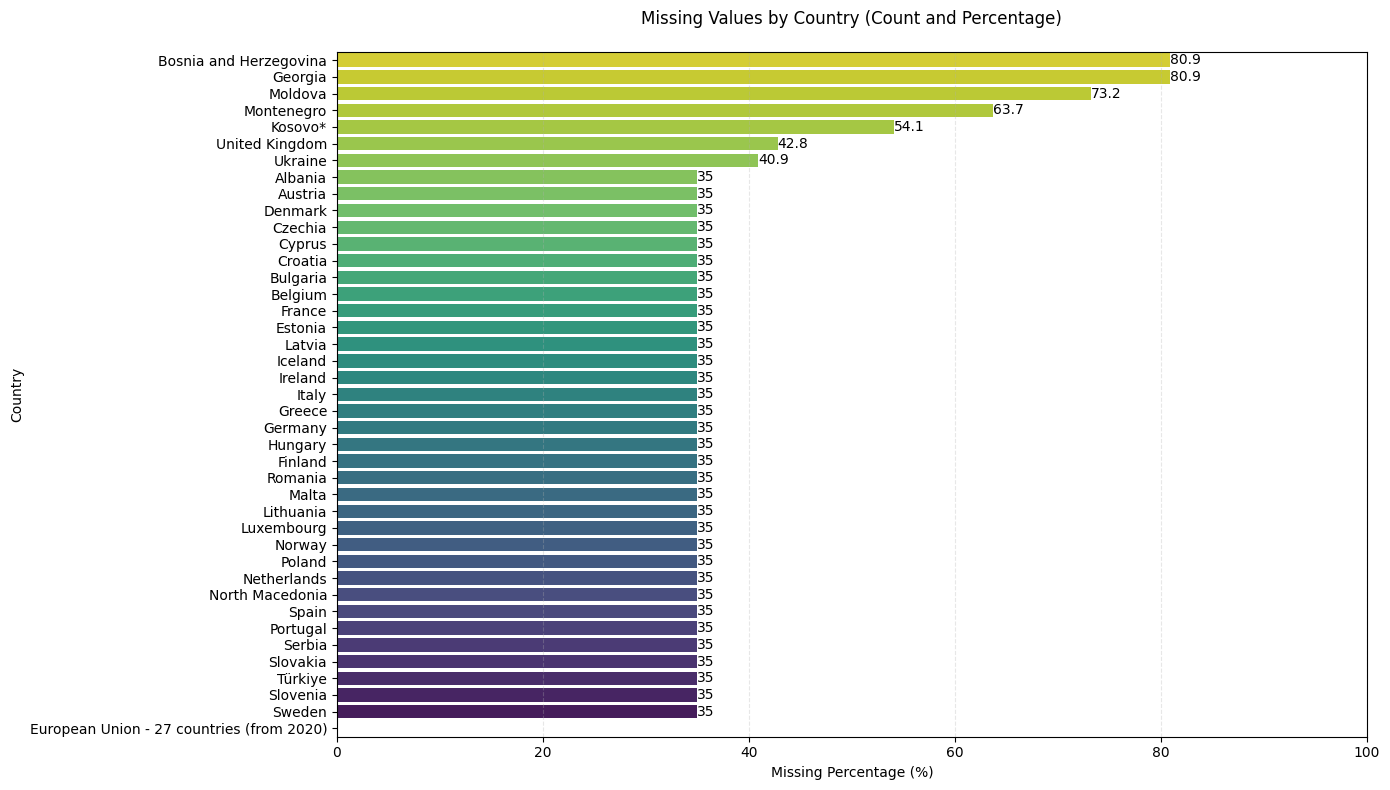

In [37]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Missing_Percentage', y='Country', data=nan_analysis, 
                 palette='viridis_r', dodge=False)

for i in range(nan_analysis.shape[0]-1):
    ax.bar_label(ax.containers[i], fontsize=10)

plt.title('Missing Values by Country (Count and Percentage)', pad=20)
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Country')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

According to the figure, the countries with the largest percentages of missing data (>70%) are **Bosnia and Herzegovina**, **Georgia**, and **Moldova**. This indicates that the data quality is low.  The **35% missingness** in the majority of other nations is probably caused by uniform gaps across particular variables or years.  Reliable analysis may need to remove countries with more than 50% missing data.

In [38]:
nan_analysis_with_nrg = df.groupby(['Country','Energy Type','Energy Supply and Consumption'])['Value'].agg(
    Missing_Values=lambda x: x.isna().sum(),
    Missing_Percentage=lambda x: round(x.isna().mean() * 100, 1)
).reset_index()

In [39]:
nan_analysis_with_nrg[nan_analysis_with_nrg['Missing_Percentage'] > 50]

,Country,Energy Type,Energy Supply and Consumption,Missing_Values,Missing_Percentage
1,Albania,Electricity,Change in stock,34,100.0
36,Albania,Electricity,Final consumption - non-energy use,34,100.0
43,Albania,Electricity,Final consumption - transport sector - domesti...,34,100.0
44,Albania,Electricity,Final consumption - transport sector - domesti...,34,100.0
50,Albania,Electricity,Final energy consumption - Energy Efficiency D...,34,100.0
...,...,...,...,...,...
44777,United Kingdom,Solid fossil fuels,Transformation output - coal liquefaction plants,34,100.0
44779,United Kingdom,Solid fossil fuels,Transformation output - electricity and heat g...,34,100.0
44781,United Kingdom,Solid fossil fuels,Transformation output - gas-to-liquids plants,34,100.0
44782,United Kingdom,Solid fossil fuels,Transformation output - liquid biofuels blended,34,100.0


In [40]:
df_ire = df[df['Country']=='Ireland'].reset_index(drop=True)

In [41]:
df_ire.groupby('Energy Type')['Value'].sum()

Energy Type
Electricity                                                436145.036
Heat                                                            0.000
Manufactured gases                                              0.000
Natural gas                                                852589.659
Non-renewable waste                                          9607.627
Nuclear heat                                                    0.000
Oil and petroleum products (excluding biofuel portion)    2336910.153
Oil shale and oil sands                                         0.000
Peat and peat products                                     210908.020
Renewables and biofuels                                    181346.591
Solid fossil fuels                                         338653.839
Total                                                     5652970.174
Name: Value, dtype: float64

We can infer from the above cell that certain energy types have 0 values, indicating that they are not used in Ireland.  Since we are now concentrating on Ireland, there is no reason to maintain that level of enthusiasm.

In [42]:
df_ire = df_ire[df_ire["Energy Type"].isin(['Electricity', 'Natural gas', 
                                   'Non-renewable waste', 'Oil and petroleum products (excluding biofuel portion)',
                                  'Peat and peat products', 'Renewables and biofuels', 'Solid fossil fuels'])]

In [43]:
df_ire.isna().sum()

Year                                0
Country                             0
Energy Type                         0
Energy Supply and Consumption       0
Value                            6936
dtype: int64

In [44]:
df_ire.shape

(21896, 5)

In [45]:
ire_null = df_ire.groupby(['Energy Type','Energy Supply and Consumption'])['Value'].agg(
    Missing_Percentage=lambda x: round(x.isna().mean() * 100, 1)
).reset_index().sort_values("Missing_Percentage",ascending=False)

In [46]:
ire_null = ire_null[ire_null['Missing_Percentage']==100]

In [47]:
ire_null

,Energy Type,Energy Supply and Consumption,Missing_Percentage
626,Solid fossil fuels,Transformation input - liquid biofuels blended...,100.0
625,Solid fossil fuels,Transformation input - gas-to-liquids plants -...,100.0
611,Solid fossil fuels,Primary energy consumption - Energy Efficiency...,100.0
609,Solid fossil fuels,International aviation,100.0
607,Solid fossil fuels,Gross inland consumption - Energy Efficiency D...,100.0
...,...,...,...
635,Solid fossil fuels,Transformation output - coal liquefaction plants,100.0
634,Solid fossil fuels,Transformation output - charcoal production pl...,100.0
632,Solid fossil fuels,Transformation output - blended in natural gas,100.0
629,Solid fossil fuels,Transformation input - refineries and petroche...,100.0


Here, we can see that specific energy type has few Energy Supply and Consumption which contains 100% null values. Since our Analysis is Ireland Centric, we will be dropping the categoriesfrom whole dataset

In [48]:
remove_pairs = set(zip(ire_null['Energy Type'], ire_null['Energy Supply and Consumption']))

filtered_df = df_ire[~df_ire.apply(lambda x: 
                          (x['Energy Type'], x['Energy Supply and Consumption']) in remove_pairs, 
                          axis=1)].reset_index()

In [49]:
filtered_df.isnull().sum()

index                            0
Year                             0
Country                          0
Energy Type                      0
Energy Supply and Consumption    0
Value                            0
dtype: int64

In [50]:
filtered_df.drop('index', axis=1, inplace=True)
filtered_df.head(3)

,Year,Country,Energy Type,Energy Supply and Consumption,Value
0,1990,Ireland,Solid fossil fuels,Available for final consumption,839.172
1,1990,Ireland,Electricity,Available for final consumption,1020.464
2,1990,Ireland,Natural gas,Available for final consumption,998.861


In [51]:
filtered_df.shape

(14960, 5)

Here, we got clean dataset for Ireland. 

Let's apply the same process on our main dataframe

In [52]:
df_filtered_on_nrg = df[df["Energy Type"].isin(['Electricity', 'Natural gas', 
                                   'Non-renewable waste', 'Oil and petroleum products (excluding biofuel portion)',
                                  'Peat and peat products', 'Renewables and biofuels', 'Solid fossil fuels'])]

# Filter the main dataframe df to exclude these pairs
filtered_df_complete = df_filtered_on_nrg[~df_filtered_on_nrg.apply(lambda x: 
                          (x['Energy Type'], x['Energy Supply and Consumption']) in remove_pairs, 
                          axis=1)].reset_index()

In [53]:
filtered_df_complete.drop('index', axis=1, inplace=True)
filtered_df_complete.shape

(614788, 5)

In [54]:
filtered_df_complete['Value'].isnull().sum()

np.int64(45489)

In [55]:
df['Value'].isnull().sum()

np.int64(596882)

After dropping those categories of energy supply and consuption, the count of null values reduced from 596882 to 45489. Now, we know that we dont have any null value in ireland's data. 

In [56]:
filtered_df_complete.groupby(['Country','Energy Type','Energy Supply and Consumption'])['Value'].agg(
    Missing_Percentage=lambda x: round(x.isna().mean() * 100, 1)
).reset_index().sort_values("Missing_Percentage", ascending=False)

,Country,Energy Type,Energy Supply and Consumption,Missing_Percentage
17919,United Kingdom,Peat and peat products,Primary energy consumption (Europe 2020-2030),100.0
17791,United Kingdom,Non-renewable waste,Primary energy consumption (Europe 2020-2030),100.0
17458,Ukraine,Peat and peat products,Primary energy consumption (Europe 2020-2030),100.0
17521,Ukraine,Renewables and biofuels,Final energy consumption (Europe 2020-2030),100.0
17987,United Kingdom,Renewables and biofuels,Gross inland consumption (Europe 2020-2030),100.0
...,...,...,...,...
2683,Cyprus,Electricity,Final consumption - transport sector - pipelin...,0.0
2682,Cyprus,Electricity,Final consumption - transport sector - not els...,0.0
2681,Cyprus,Electricity,Final consumption - transport sector - energy use,0.0
2680,Cyprus,Electricity,Final consumption - other sectors - not elsewh...,0.0


We still have some null values in our dataset. Let's drop them

In [57]:
filtered_df_complete.dropna(inplace=True, ignore_index=True,)

In [58]:
filtered_df_complete.isna().sum()

Year                             0
Country                          0
Energy Type                      0
Energy Supply and Consumption    0
Value                            0
dtype: int64

In [59]:
df_cleaned = filtered_df_complete

In [60]:
df_cleaned.shape

(569299, 5)

##### Finally, we got the clean dataset

# Statistical Analysis

### Population Parameter Estimation

In [61]:
import scipy.stats as stats

# Calculate 95% CI for EU's renewable energy proportion
renewables = df_cleaned[df_cleaned['Energy Type'] == 'Renewables and biofuels']['Value']
total_energy = df_cleaned.groupby(['Country','Year'])['Value'].sum().reset_index()['Value']

prop = renewables.sum()/total_energy.sum()
n = len(renewables)
ci = stats.norm.interval(0.95, loc=prop, scale=np.sqrt(prop*(1-prop)/n))

print(f"EU Renewable Proportion: {prop:.2%}")
print(f"95% CI: [{ci[0]:.2%}, {ci[1]:.2%}]")

EU Renewable Proportion: 7.74%
95% CI: [7.57%, 7.91%]


The estimated share of renewable energy in the EU's overall energy consumption is 7.74%.  The genuine population proportion, with 95% confidence, is between 7.57% and 7.91%.  This small range implies a high degree of accuracy in the estimation, showing that renewables continue to account for a small portion of the market yet are consistently adopted by nations.

### Hypothesis Test for Mean Consumption

In [62]:
# Test if Ireland's mean consumption differs from EU average
ireland = df_cleaned[df_cleaned['Country']=='Ireland'].groupby('Year')['Value'].sum()
eu_others = df_cleaned[df_cleaned['Country']!='Ireland'].groupby(['Country','Year'])['Value'].sum().groupby('Year').mean()

t_stat, p_val = stats.ttest_ind(ireland, eu_others)
print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: -73.78, p-value: 0.0000


In [63]:
# Compare Ireland vs Denmark (similar size, coastal)
ireland = df_cleaned[(df_cleaned['Country']=='Ireland') & (df_cleaned['Energy Type']=='Natural gas')].set_index('Year')['Value']
denmark = df_cleaned[(df_cleaned['Country']=='Denmark') & (df_cleaned['Energy Type']=='Natural gas')].set_index('Year')['Value']

t_stat, p_val = stats.ttest_rel(ireland, denmark)
print(f"Paired t-test Ireland vs Denmark (Gas): t={t_stat:.2f}, p={p_val:.4f}")

Paired t-test Ireland vs Denmark (Gas): t=-3.81, p=0.0001


With a p-value far below 0.05 suggesting strong evidence against the null hypothesis of equal means, the paired t-test result (t = -3.81, p = 0.0001) suggests a statistically significant difference in petrol consumption between Ireland and Denmark.

### ANOVA: Test for Mean Differences Across Energy Types

In [64]:
import scipy.stats as stats

df = df_cleaned
# Filter for a specific year, e.g., 2023
df_2023 = df[df['Year'] == 2023]

# Group by energy type
groups = [group['Value'].dropna() for name, group in df_2023.groupby('Energy Type')]

# ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 30.555978201406376, p-value: 1.0701678011377392e-36


The ANOVA result shows a highly significant difference in the mean energy consumption of the various energy kinds (F = 30.56, p ≈ 1.07e-36). The null hypothesis that all groups have the same mean is forcefully rejected by the incredibly small p-value.

### T-test: Compare Consumption Between Two Countries Germany and Ireland

In [65]:
df_subset = df[df['Country'].isin(['Germany', 'Ireland'])]
df_subset = df_subset[df_subset['Energy Supply and Consumption'] == 'Available for final consumption']

germany = df_subset[df_subset['Country'] == 'Germany']['Value']
france = df_subset[df_subset['Country'] == 'Ireland']['Value']

t_stat, p_val = stats.ttest_ind(germany, france, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")


T-statistic: 12.72321218126275, p-value: 4.14775248240111e-32


The mean energy consumption of **Germany and Ireland** differs **highly significantly**, according to the t-test result (t = 12.72, p ≈ 4.15e-32).  Their consumption levels are statistically different, as seen by the incredibly low p-value.

### Chi-Square Test: Independence of Energy Type and Consumption Category

In [66]:
contingency = pd.crosstab(df['Energy Type'], df['Energy Supply and Consumption'])
chi2, p, dof, ex = stats.chi2_contingency(contingency)
print(f"Chi-square statistic: {chi2}, p-value: {p}")


Chi-square statistic: 229369.24882768292, p-value: 0.0


The results of the Chi-square test show a **very high dependency** between **energy type** and **energy supply/consumption category** (χ² = 229,369.25, p = 0.0).  With a p-value of 0.0, we may confidently reject the null hypothesis of independence.

### Mann-Whitney U Test: Compare Renewable vs Fossil Fuel Consumption

In [67]:
renew = df[df['Energy Type'] == 'Renewables and biofuels']['Value']
fossil = df[df['Energy Type'] == 'Solid fossil fuels']['Value']

u_stat, p_val = stats.mannwhitneyu(renew, fossil, alternative='two-sided')
print(f"U statistic: {u_stat}, p-value: {p_val}")


U statistic: 3970543040.0, p-value: 3.942819994794199e-35


There is a **highly significant difference in the distribution** of energy consumption between **solid fossil fuels** and **renewables and biofuels**, according to the Mann-Whitney U test result (U = 3,970,543,040, p ≈ 3.94e-35).  Their median consumption levels are not equal, as indicated by the extremely low p-value.

### Trend Test: Correlation Between Year and Energy Consumption

In [68]:
# Use data from one country for clarity (e.g., Italy)
italy = df[df['Country'] == 'Ireland']
grouped = italy.groupby('Year')['Value'].sum().reset_index()

rho, p_val = stats.spearmanr(grouped['Year'], grouped['Value'])
print(f"Spearman correlation: {rho}, p-value: {p_val}")


Spearman correlation: 0.6210847975553857, p-value: 8.869738547289192e-05


There is a **moderate to strong positive association** between **year and energy consumption** in the chosen nation, according to the Spearman correlation result (ρ = 0.621, p ≈ 8.87e-05).  The statistical significance of this rising tendency is confirmed by the low p-value.

# Data Visualization

### Energy consuption sorted by cities from 1990 to 2023 (In Millions)

In [69]:
df_cleaned

,Year,Country,Energy Type,Energy Supply and Consumption,Value
0,1990,Albania,Solid fossil fuels,Available for final consumption,571.289
1,1990,Austria,Solid fossil fuels,Available for final consumption,1088.683
2,1990,Belgium,Solid fossil fuels,Available for final consumption,1963.504
3,1990,Bulgaria,Solid fossil fuels,Available for final consumption,1845.330
4,1990,Cyprus,Solid fossil fuels,Available for final consumption,64.060
...,...,...,...,...,...
569294,2023,Sweden,Renewables and biofuels,Transformation output - refineries and petroch...,0.000
569295,2023,Slovenia,Renewables and biofuels,Transformation output - refineries and petroch...,0.000
569296,2023,Slovakia,Renewables and biofuels,Transformation output - refineries and petroch...,0.000
569297,2023,Türkiye,Renewables and biofuels,Transformation output - refineries and petroch...,0.000


In [70]:
data=pd.DataFrame(round(df_cleaned.groupby(['Country'])['Value'].sum().sort_values(ascending=False) / 1000000, 2))
data.head(10)

,Value
Country,
European Union - 27 countries (from 2020),482.43
Germany,104.06
United Kingdom,64.21
Italy,60.16
France,59.98
Spain,41.26
Netherlands,40.56
Türkiye,32.39
Ukraine,32.32


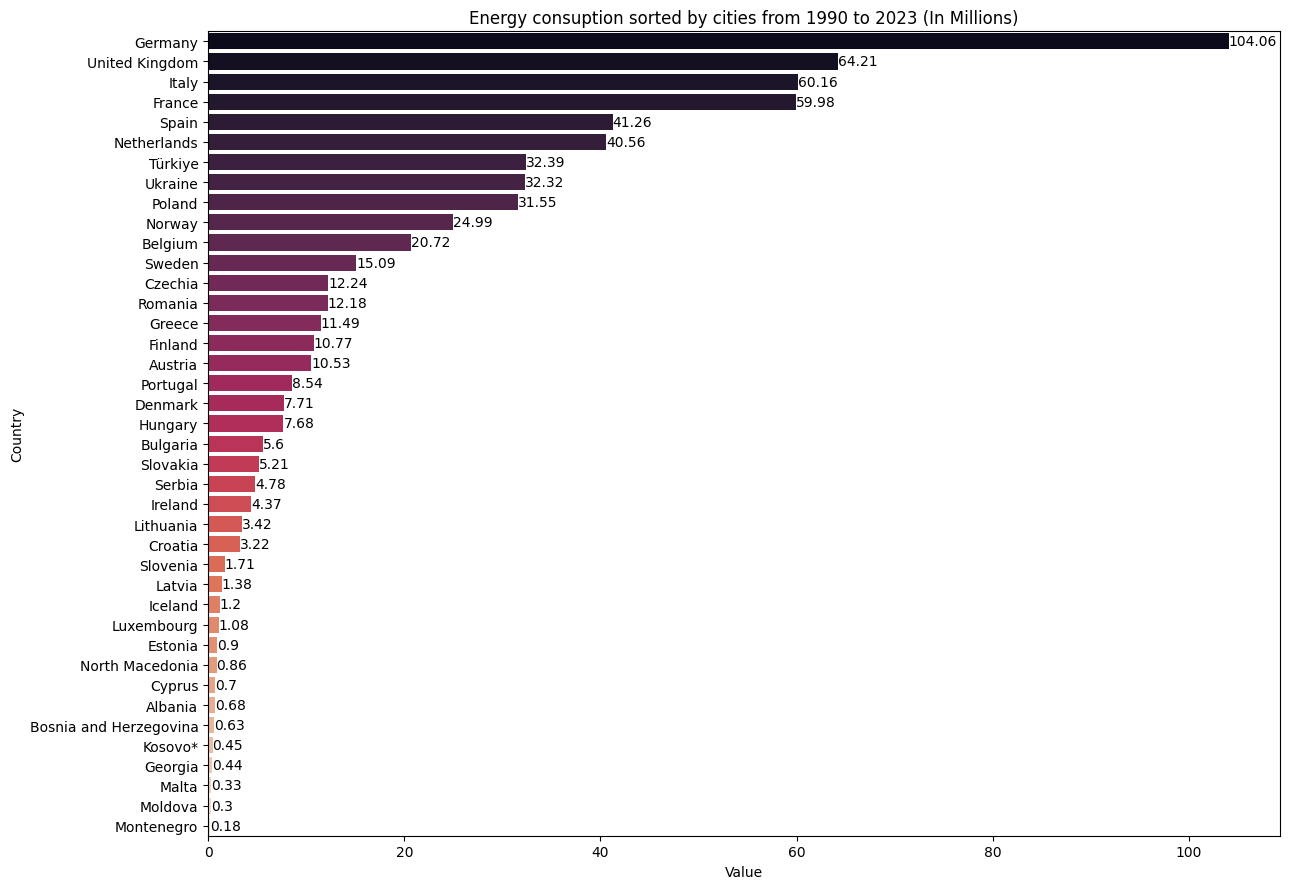

In [71]:
plt.figure(figsize=(13, 9))
ax = sns.barplot(x='Value', y = 'Country', data=data[1:], palette="rocket")
for i in range(data.shape[0]-1):
    ax.bar_label(ax.containers[i], fontsize=10)
plt.title("Energy consuption sorted by cities from 1990 to 2023 (In Millions)")
plt.tight_layout()
plt.show()

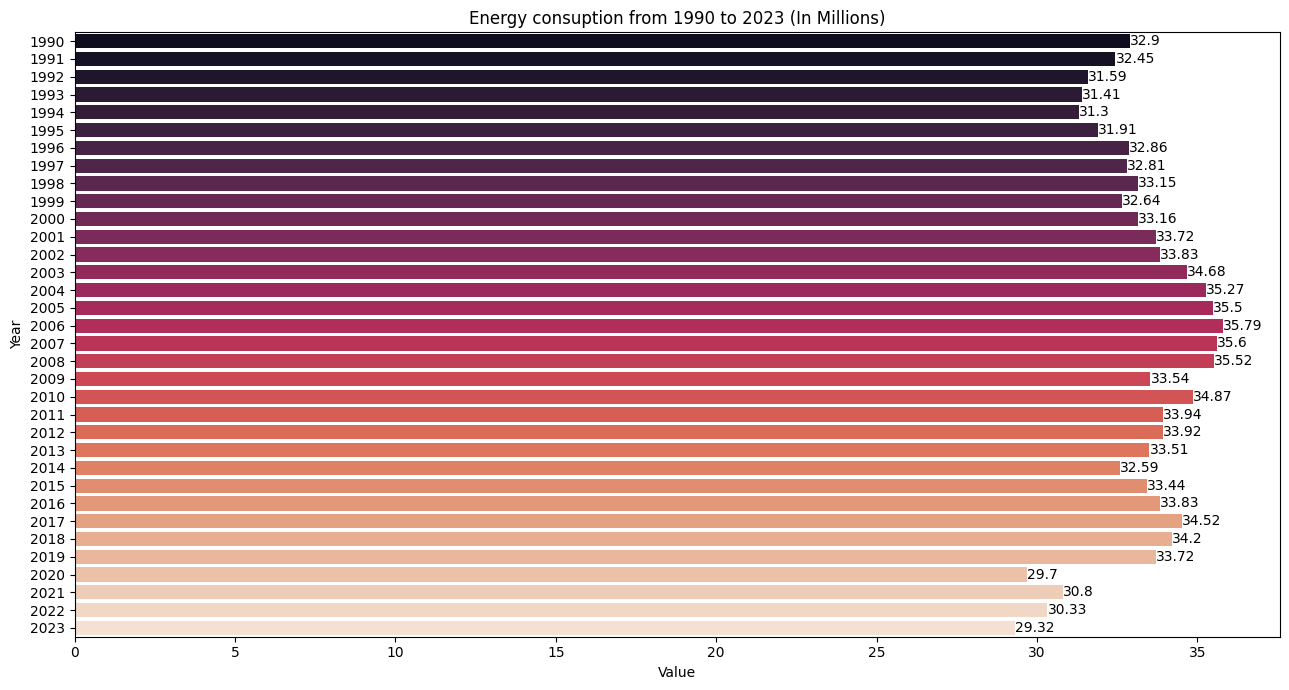

In [72]:
data = pd.DataFrame(round(df_cleaned.groupby(['Year'])['Value'].sum().sort_values(ascending=False) / 1000000, 2))

plt.figure(figsize=(13, 7))
ax = sns.barplot(x='Value', y = 'Year', data=data, palette="rocket", orient="h")
for i in range(data.shape[0]):
    ax.bar_label(ax.containers[i], fontsize=10)
plt.title("Energy consuption from 1990 to 2023 (In Millions)")
plt.tight_layout()
plt.show()

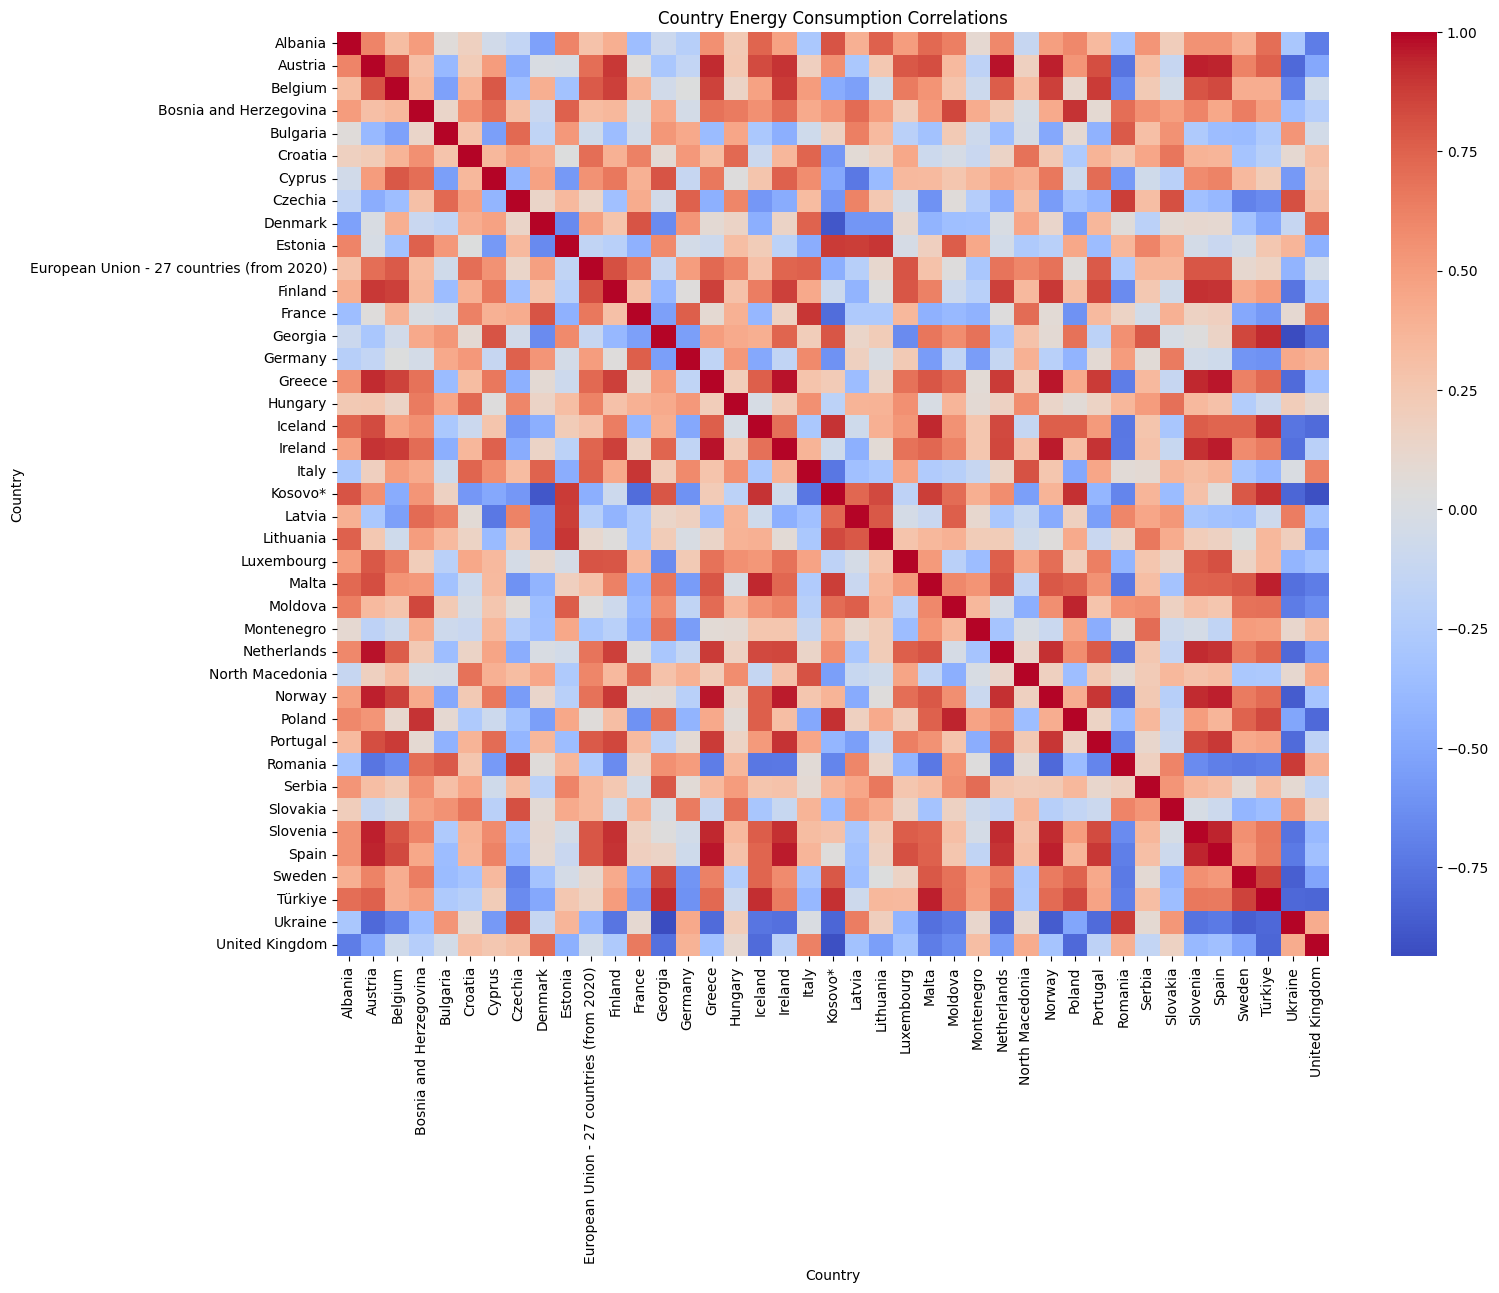

In [73]:
corr_matrix = df_cleaned.pivot_table(index='Year', columns='Country', values='Value').corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Country Energy Consumption Correlations')
plt.show()

In [74]:
df_ire.groupby('Energy Supply and Consumption')['Value'].sum().sort_values(ascending=False)

Energy Supply and Consumption
Gross available energy                             472664.650
Gross inland consumption                           468389.677
Total energy supply                                445467.498
Imports                                            427986.218
Available for final consumption                    347725.646
                                                      ...    
Transformation output - blast furnaces                  0.000
Transformation output - not elsewhere specified         0.000
Transformation output - coke ovens                      0.000
Transformation output - patent fuel plants              0.000
Statistical differences                             -8004.206
Name: Value, Length: 92, dtype: float64

In [75]:
df_ire['Energy Type'].unique()

array(['Solid fossil fuels', 'Electricity', 'Natural gas',
       'Oil and petroleum products (excluding biofuel portion)',
       'Peat and peat products', 'Renewables and biofuels',
       'Non-renewable waste'], dtype=object)

In [76]:
df_ire.head()

,Year,Country,Energy Type,Energy Supply and Consumption,Value
0,1990,Ireland,Solid fossil fuels,Available for final consumption,839.172
2,1990,Ireland,Electricity,Available for final consumption,1020.464
3,1990,Ireland,Natural gas,Available for final consumption,998.861
6,1990,Ireland,Oil and petroleum products (excluding biofuel ...,Available for final consumption,4112.601
7,1990,Ireland,Peat and peat products,Available for final consumption,511.485


In [77]:
# df_ire[['Country', 'Energy Type', 'Energy Supply and Consumption', 'Year','Value']].to_csv('Ireland Energy Data.csv', index=False)
# df_cleaned[['Country', 'Energy Type', 'Energy Supply and Consumption', 'Year','Value']].to_csv('EU Energy Data.csv', index=False)

In [78]:
df_ire.head()

,Year,Country,Energy Type,Energy Supply and Consumption,Value
0,1990,Ireland,Solid fossil fuels,Available for final consumption,839.172
2,1990,Ireland,Electricity,Available for final consumption,1020.464
3,1990,Ireland,Natural gas,Available for final consumption,998.861
6,1990,Ireland,Oil and petroleum products (excluding biofuel ...,Available for final consumption,4112.601
7,1990,Ireland,Peat and peat products,Available for final consumption,511.485


In [79]:
df_ire['Energy Supply and Consumption'].unique()

array(['Available for final consumption', 'Distribution losses',
       'Exports', 'Final consumption - energy use',
       'Final consumption - industry sector - construction - energy use',
       'Final consumption - industry sector - chemical and petrochemical - energy use',
       'Final consumption - industry sector - energy use',
       'Final consumption - industry sector - food, beverages and tobacco - energy use',
       'Final consumption - industry sector - iron and steel - energy use',
       'Final consumption - industry sector - machinery - energy use',
       'Final consumption - industry sector - mining and quarrying - energy use',
       'Final consumption - industry sector - non-ferrous metals - energy use',
       'Final consumption - industry sector - non-metallic minerals - energy use',
       'Final consumption - industry sector - not elsewhere specified - energy use',
       'Final consumption - industry sector - paper, pulp and printing - energy use',
       'Fi

# Ireland vs Other EU Countries

In [80]:
df_ire_eu = df[df['Country'].isin(["Ireland", "Germany", "France", "Finland", "Belgium", "Italy"])].reset_index(drop=True)
df_ire_eu.head()

,Year,Country,Energy Type,Energy Supply and Consumption,Value
0,1990,Belgium,Solid fossil fuels,Available for final consumption,1963.504
1,1990,Germany,Solid fossil fuels,Available for final consumption,31752.378
2,1990,Finland,Solid fossil fuels,Available for final consumption,887.645
3,1990,France,Solid fossil fuels,Available for final consumption,5280.395
4,1990,Ireland,Solid fossil fuels,Available for final consumption,839.172


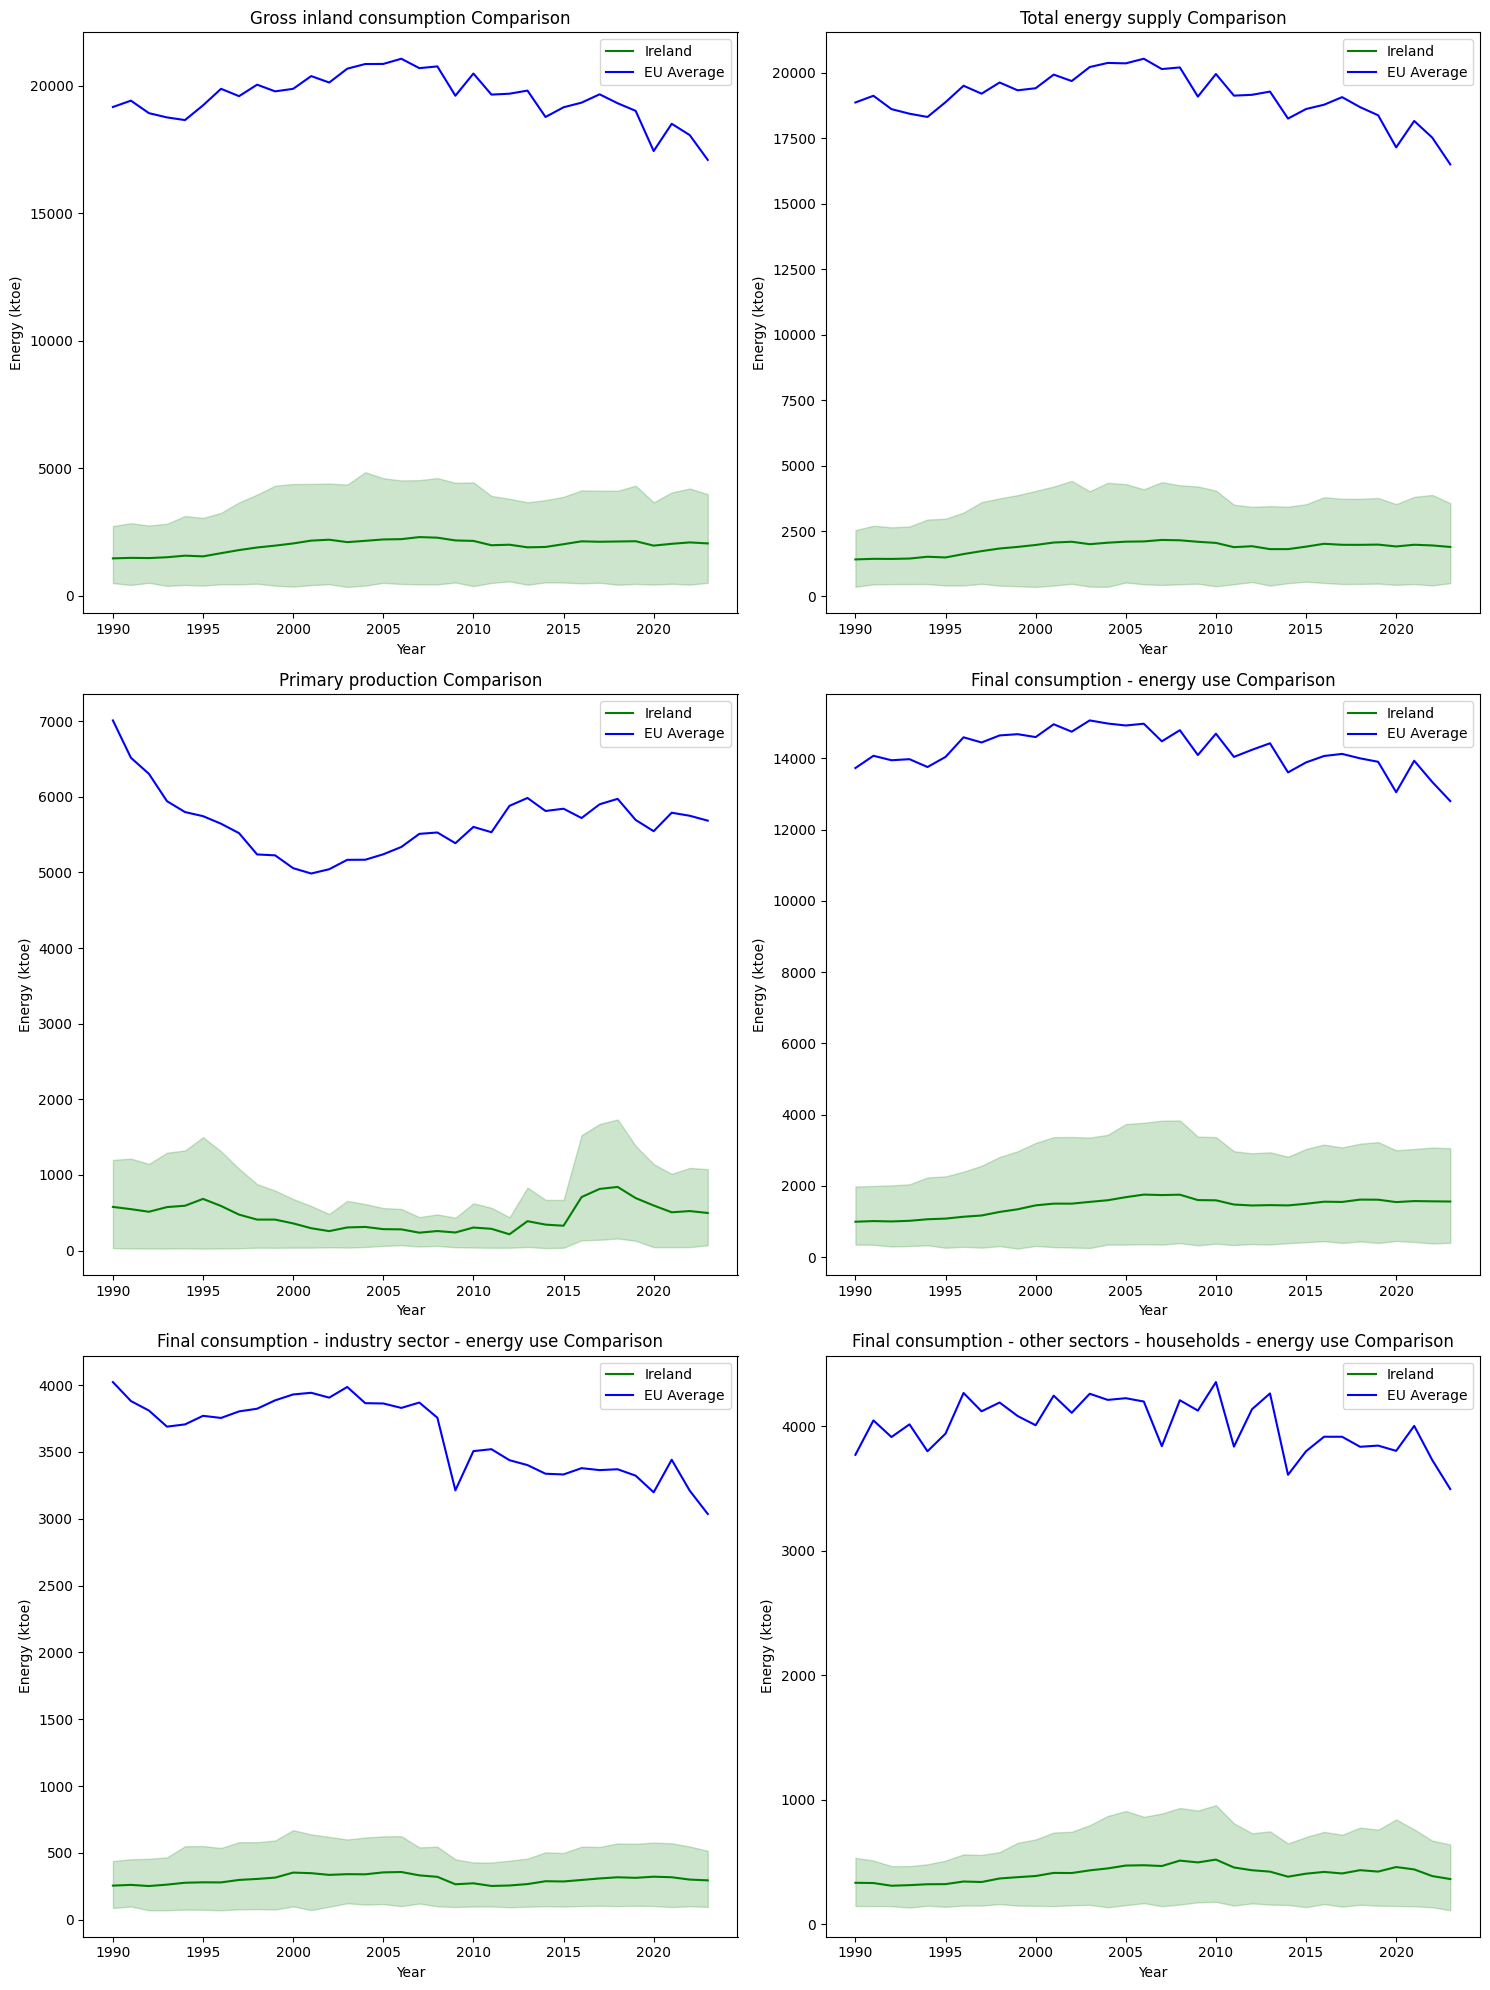

In [81]:
# Select key metrics to compare
key_metrics = [
    'Gross inland consumption',
    'Total energy supply',
    'Primary production',
    'Final consumption - energy use',
    'Final consumption - industry sector - energy use',
    'Final consumption - other sectors - households - energy use'
]

plt.figure(figsize=(15, 20))
for i, metric in enumerate(key_metrics, 1):
    plt.subplot(3, 2, i)
    
    # Ireland data
    ireland = df_ire_eu[(df_ire_eu['Country'] == 'Ireland') & 
                         (df_ire_eu['Energy Supply and Consumption'] == metric)]
    sns.lineplot(data=ireland, x='Year', y='Value', label='Ireland', color='green')
    
    # EU average
    eu_avg = df_ire_eu[(df_ire_eu['Country'] != 'Ireland') & 
                        (df_ire_eu['Energy Supply and Consumption'] == metric)]
    eu_avg = eu_avg.groupby('Year')['Value'].mean().reset_index()
    sns.lineplot(data=eu_avg, x='Year', y='Value', label='EU Average', color='blue')
    
    plt.title(f'{metric} Comparison')
    plt.ylabel('Energy (ktoe)')
    plt.legend()

plt.tight_layout()
plt.show()

In [82]:
df_ire_eu['Country'].unique()

array(['Belgium', 'Germany', 'Finland', 'France', 'Ireland', 'Italy'],
      dtype=object)

In [83]:
desc_stats = df_ire_eu.groupby(['Country', 'Energy Type'])['Value'].describe()
desc_stats

count  \
Country Energy Type                                                  
Belgium Electricity                                         1904.0   
        Natural gas                                         2006.0   
        Non-renewable waste                                 1870.0   
        Oil and petroleum products (excluding biofuel p...  2278.0   
        Peat and peat products                              2142.0   
        Renewables and biofuels                             2482.0   
        Solid fossil fuels                                  2278.0   
Finland Electricity                                         1904.0   
        Natural gas                                         2006.0   
        Non-renewable waste                                 1870.0   
        Oil and petroleum products (excluding biofuel p...  2278.0   
        Peat and peat products                              2142.0   
        Renewables and biofuels                             2482.0   
        Solid fossil fuels                                  2278.0   
France  Electricity                                         1904.0   
        Natural gas                                         2006.0   
        Non-renewable waste                                 1870.0   
        Oil and petroleum products (excluding biofuel p...  2278.0   
        Peat and peat products                              2142.0   
        Renewables and biofuels                             2482.0   
        Solid fossil fuels                                  2278.0   
Germany Electricity                                         1904.0   
        Natural gas                                         2006.0   
        Non-renewable waste                                 1870.0   
        Oil and petroleum products (excluding biofuel p...  2278.0   
        Peat and peat products                              2142.0   
        Renewables and biofuels                             2482.0   
        Solid fossil fuels                                  2278.0   
Ireland Electricity                                         1904.0   
        Natural gas                                         2006.0   
        Non-renewable waste                                 1870.0   
        Oil and petroleum products (excluding biofuel p...  2278.0   
        Peat and peat products                              2142.0   
        Renewables and biofuels                             2482.0   
        Solid fossil fuels                                  2278.0   
Italy   Electricity                                         1904.0   
        Natural gas                                         2006.0   
        Non-renewable waste                                 1870.0   
        Oil and petroleum products (excluding biofuel p...  2278.0   
        Peat and peat products                              2142.0   
        Renewables and biofuels                             2482.0   
        Solid fossil fuels                                  2278.0   

                                                                    mean  \
Country Energy Type                                                        
Belgium Electricity                                           806.933915   
        Natural gas                                          1717.937970   
        Non-renewable waste                                    66.859687   
        Oil and petroleum products (excluding biofuel p...   5943.704722   
        Peat and peat products                                  0.000000   
        Renewables and biofuels                               235.573565   
        Solid fossil fuels                                    654.868144   
Finland Electricity                                           784.484952   
        Natural gas                                           345.210567   
        Non-renewable waste                                    20.024670   
        Oil and petroleum products (excluding biofuel p...   2178.78

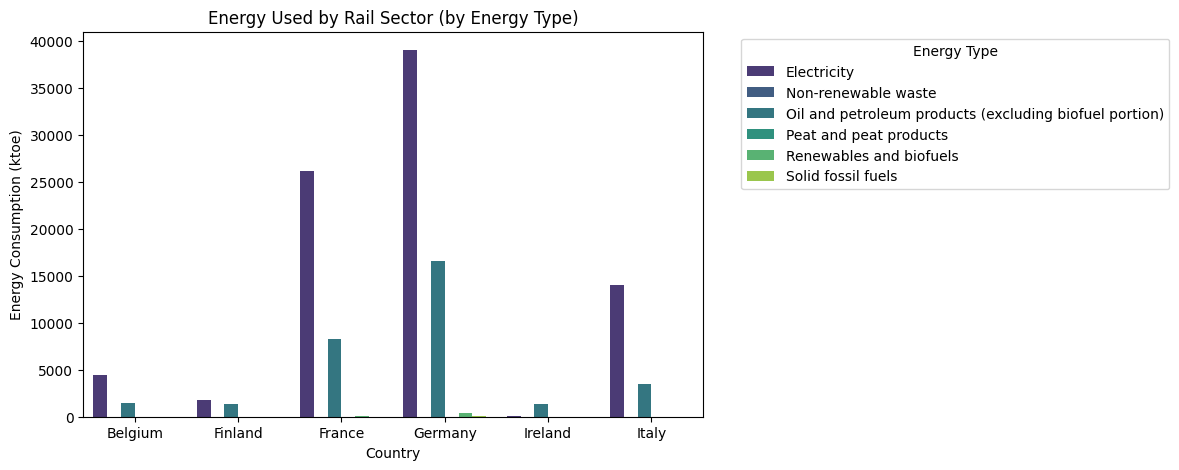

In [159]:
plt.figure(figsize=(8, 5))

rail_data = df_ire_eu[
    (df_ire_eu['Energy Supply and Consumption'] == 'Final consumption - transport sector - rail - energy use')].groupby(['Country', 'Energy Type'])['Value'].sum().reset_index()

sns.barplot(
    data=rail_data,
    x='Country',
    y='Value',
    hue='Energy Type',
    palette='viridis',  
    estimator=sum      
)
plt.title("Energy Used by Rail Sector (by Energy Type)")
plt.ylabel("Energy Consumption (ktoe)")
plt.xlabel("Country")
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

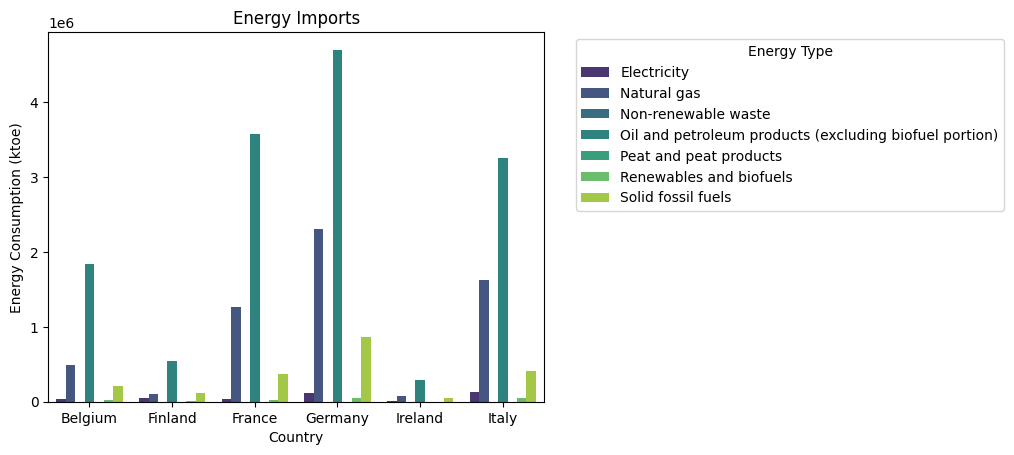

In [161]:
import_data = df_ire_eu[
    (df_ire_eu['Energy Supply and Consumption'] == 
     'Imports')].groupby(['Country', 'Energy Type'])['Value'].sum().reset_index()

sns.barplot(
    data = import_data,
    x='Country',
    y='Value',
    hue='Energy Type',
    palette='viridis',  
    estimator=sum      
)
plt.title("Energy Imports")
plt.ylabel("Energy Consumption (ktoe)")
plt.xlabel("Country")
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

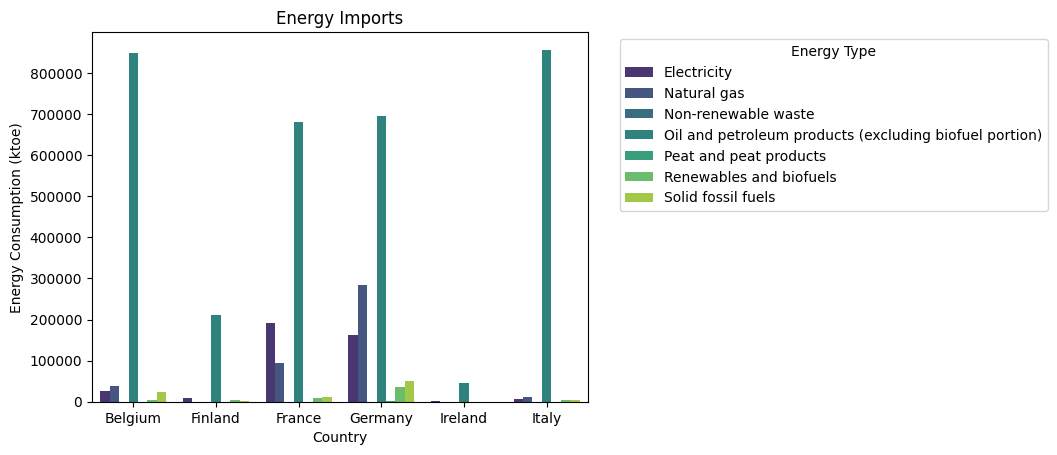

In [162]:
export_data = df_ire_eu[
    (df_ire_eu['Energy Supply and Consumption'] == 
     'Exports')].groupby(['Country', 'Energy Type'])['Value'].sum().reset_index()

sns.barplot(
    data = export_data,
    x='Country',
    y='Value',
    hue='Energy Type',
    palette='viridis',  
    estimator=sum      
)
plt.title("Energy Imports")
plt.ylabel("Energy Consumption (ktoe)")
plt.xlabel("Country")
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

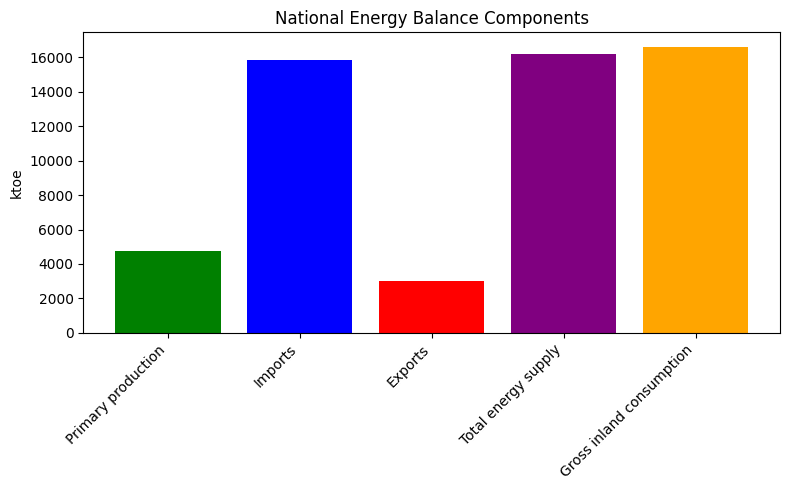

In [170]:
balance_flows = ['Primary production', 'Imports', 'Exports', 'Total energy supply', 'Gross inland consumption']
balance_values = [df_ire_eu[df_ire_eu['Energy Supply and Consumption']==x]['Value'].mean() for x in balance_flows]

plt.figure(figsize=(8,5))
plt.bar(balance_flows, balance_values, 
        color=['green', 'blue', 'red', 'purple', 'orange'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("ktoe")
plt.title("National Energy Balance Components")
plt.tight_layout()
plt.show()

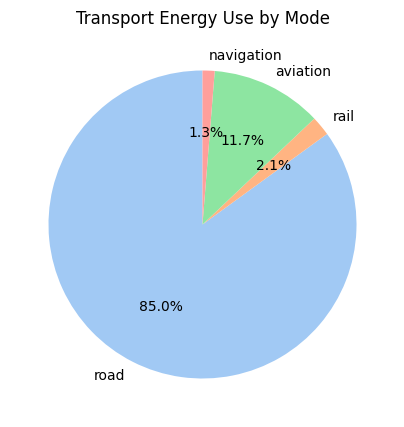

In [174]:
transport_modes = ['road', 'rail', 'aviation', 'navigation']
transport_values = [df_ire_eu[df_ire_eu['Energy Supply and Consumption'].str.contains(mode)]['Value'].sum() 
                   for mode in transport_modes]

plt.figure(figsize=(5,5))
plt.pie(transport_values, labels=transport_modes, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title("Transport Energy Use by Mode")
plt.show()

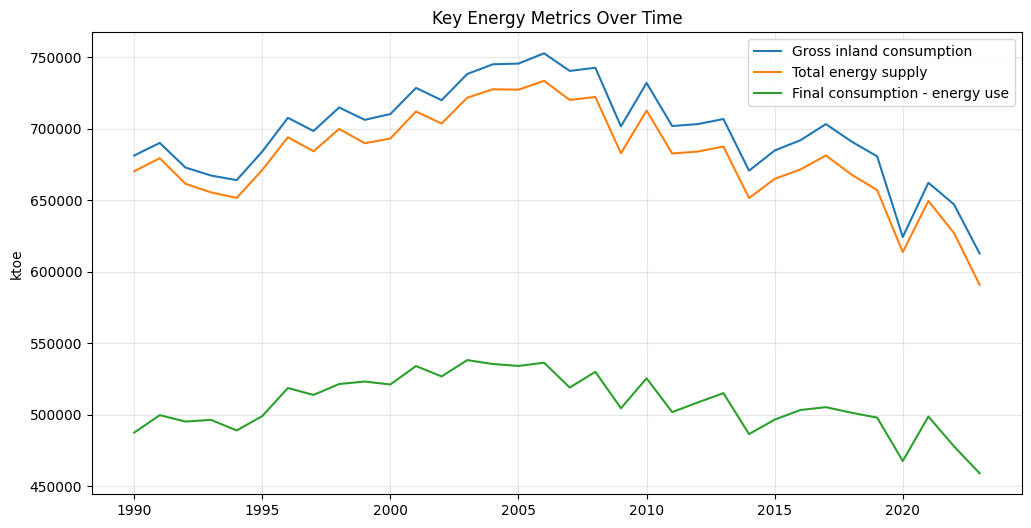

In [175]:
key_metrics = ['Gross inland consumption', 'Total energy supply', 'Final consumption - energy use']
plt.figure(figsize=(12,6))

for metric in key_metrics:
    metric_data = df_ire_eu[df_ire_eu['Energy Supply and Consumption']==metric].groupby('Year')['Value'].sum()
    plt.plot(metric_data.index, metric_data.values, label=metric)

plt.legend()
plt.ylabel("ktoe")
plt.title("Key Energy Metrics Over Time")
plt.grid(alpha=0.3)
plt.show()

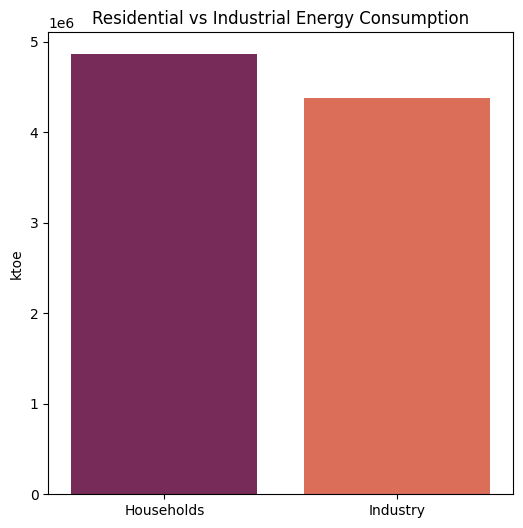

In [176]:
compare_sectors = ['households', 'industry sector - energy use']
sector_values = [df_ire_eu[df_ire_eu['Energy Supply and Consumption'].str.contains(sector)]['Value'].sum() 
                for sector in compare_sectors]

plt.figure(figsize=(6,6))
sns.barplot(x=compare_sectors, y=sector_values, palette='rocket')
plt.xticks([0,1], ['Households', 'Industry'])
plt.ylabel("ktoe")
plt.title("Residential vs Industrial Energy Consumption")
plt.show()

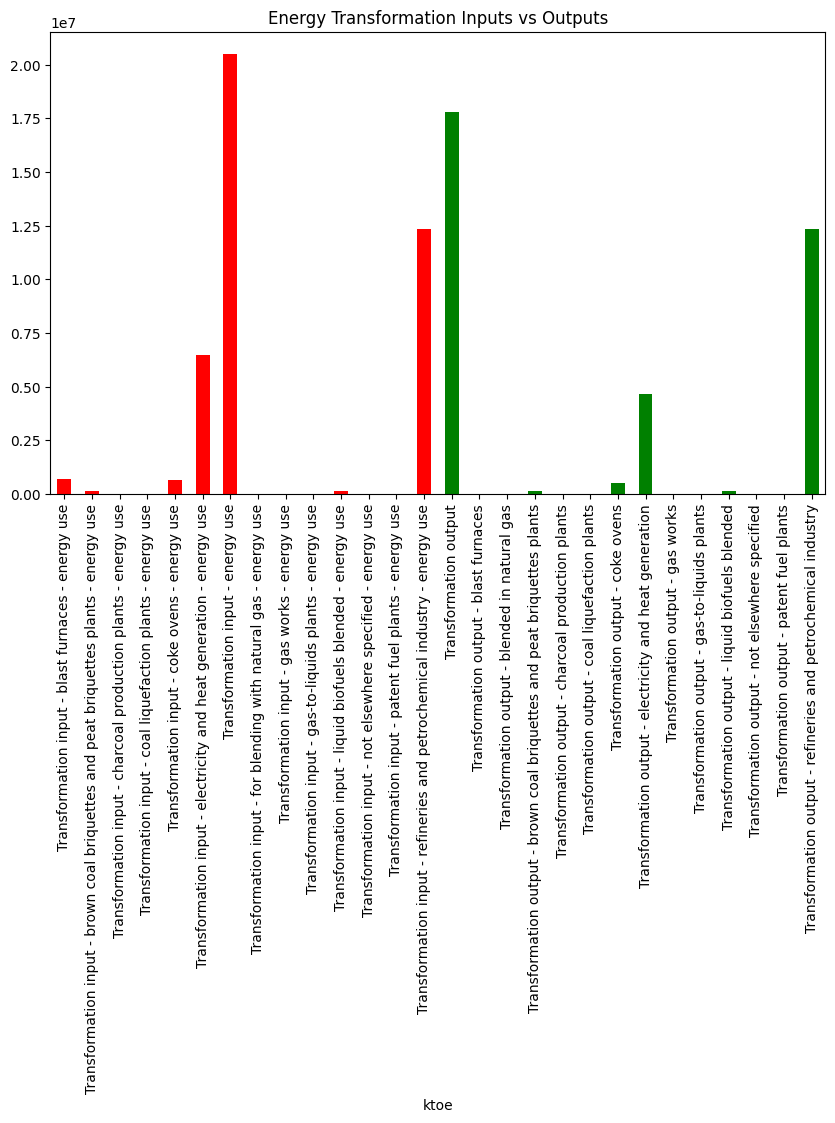

In [178]:
transformation = df_ire_eu[df_ire_eu['Energy Supply and Consumption'].str.startswith('Transformation')]
input_output = transformation.groupby('Energy Supply and Consumption')['Value'].sum()

plt.figure(figsize=(10,6))
input_output.plot(kind='bar', color=['red' if 'input' in x else 'green' for x in input_output.index])
plt.xlabel("ktoe")
plt.title("Energy Transformation Inputs vs Outputs")
plt.tight_layout()
plt.show()

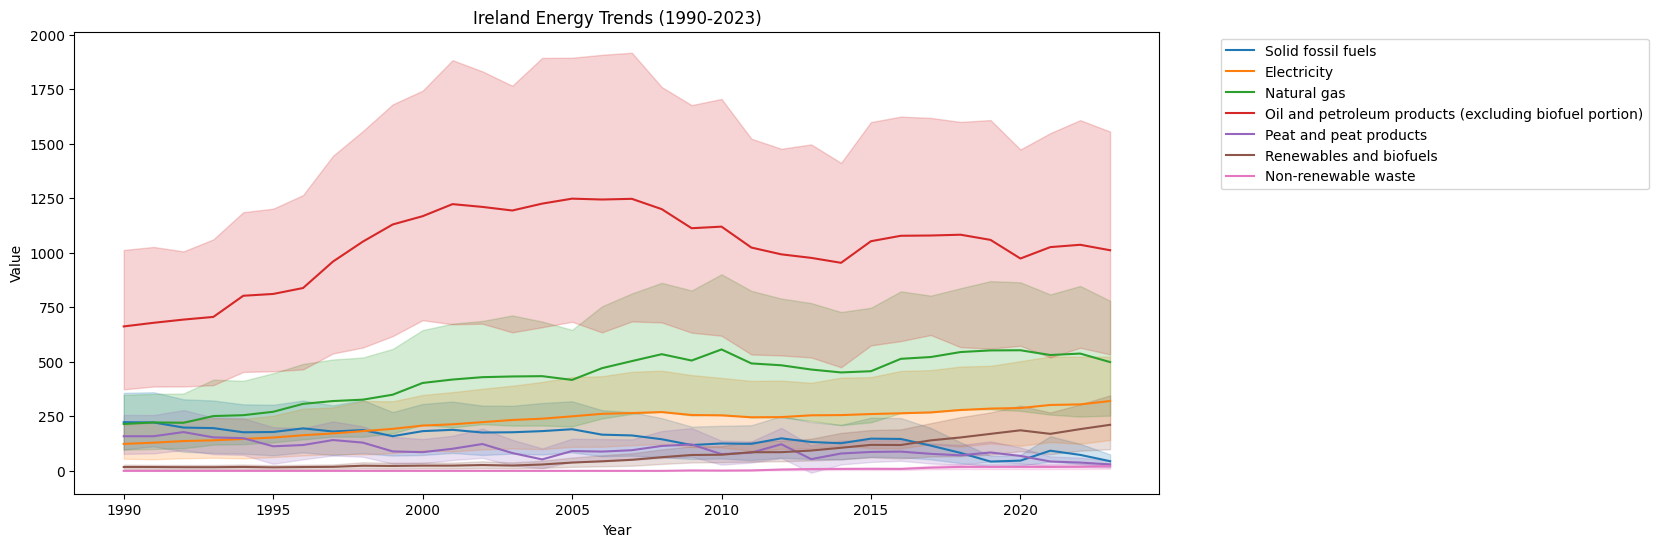

In [84]:
ireland_data = df_ire_eu[df_ire_eu['Country'] == 'Ireland']
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Value', hue='Energy Type', data=ireland_data)
plt.title('Ireland Energy Trends (1990-2023)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

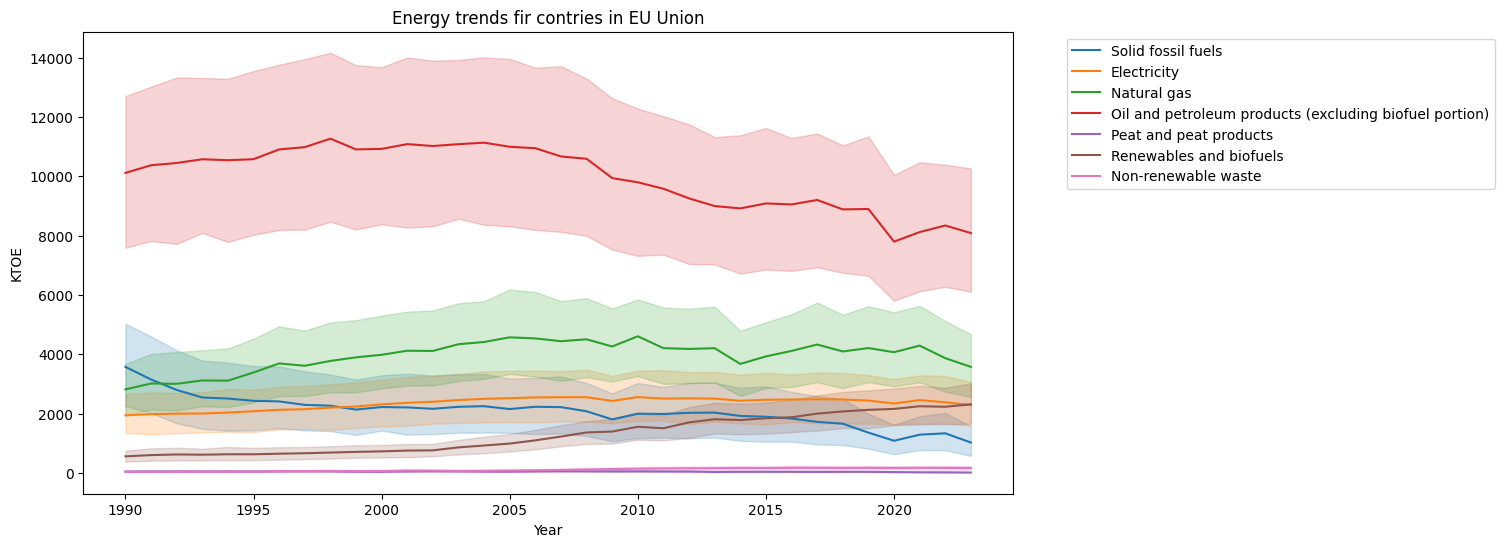

In [85]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Energy Type', data = df_ire_eu)
plt.title('Energy trends fir contries in EU Union')
plt.ylabel('KTOE')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

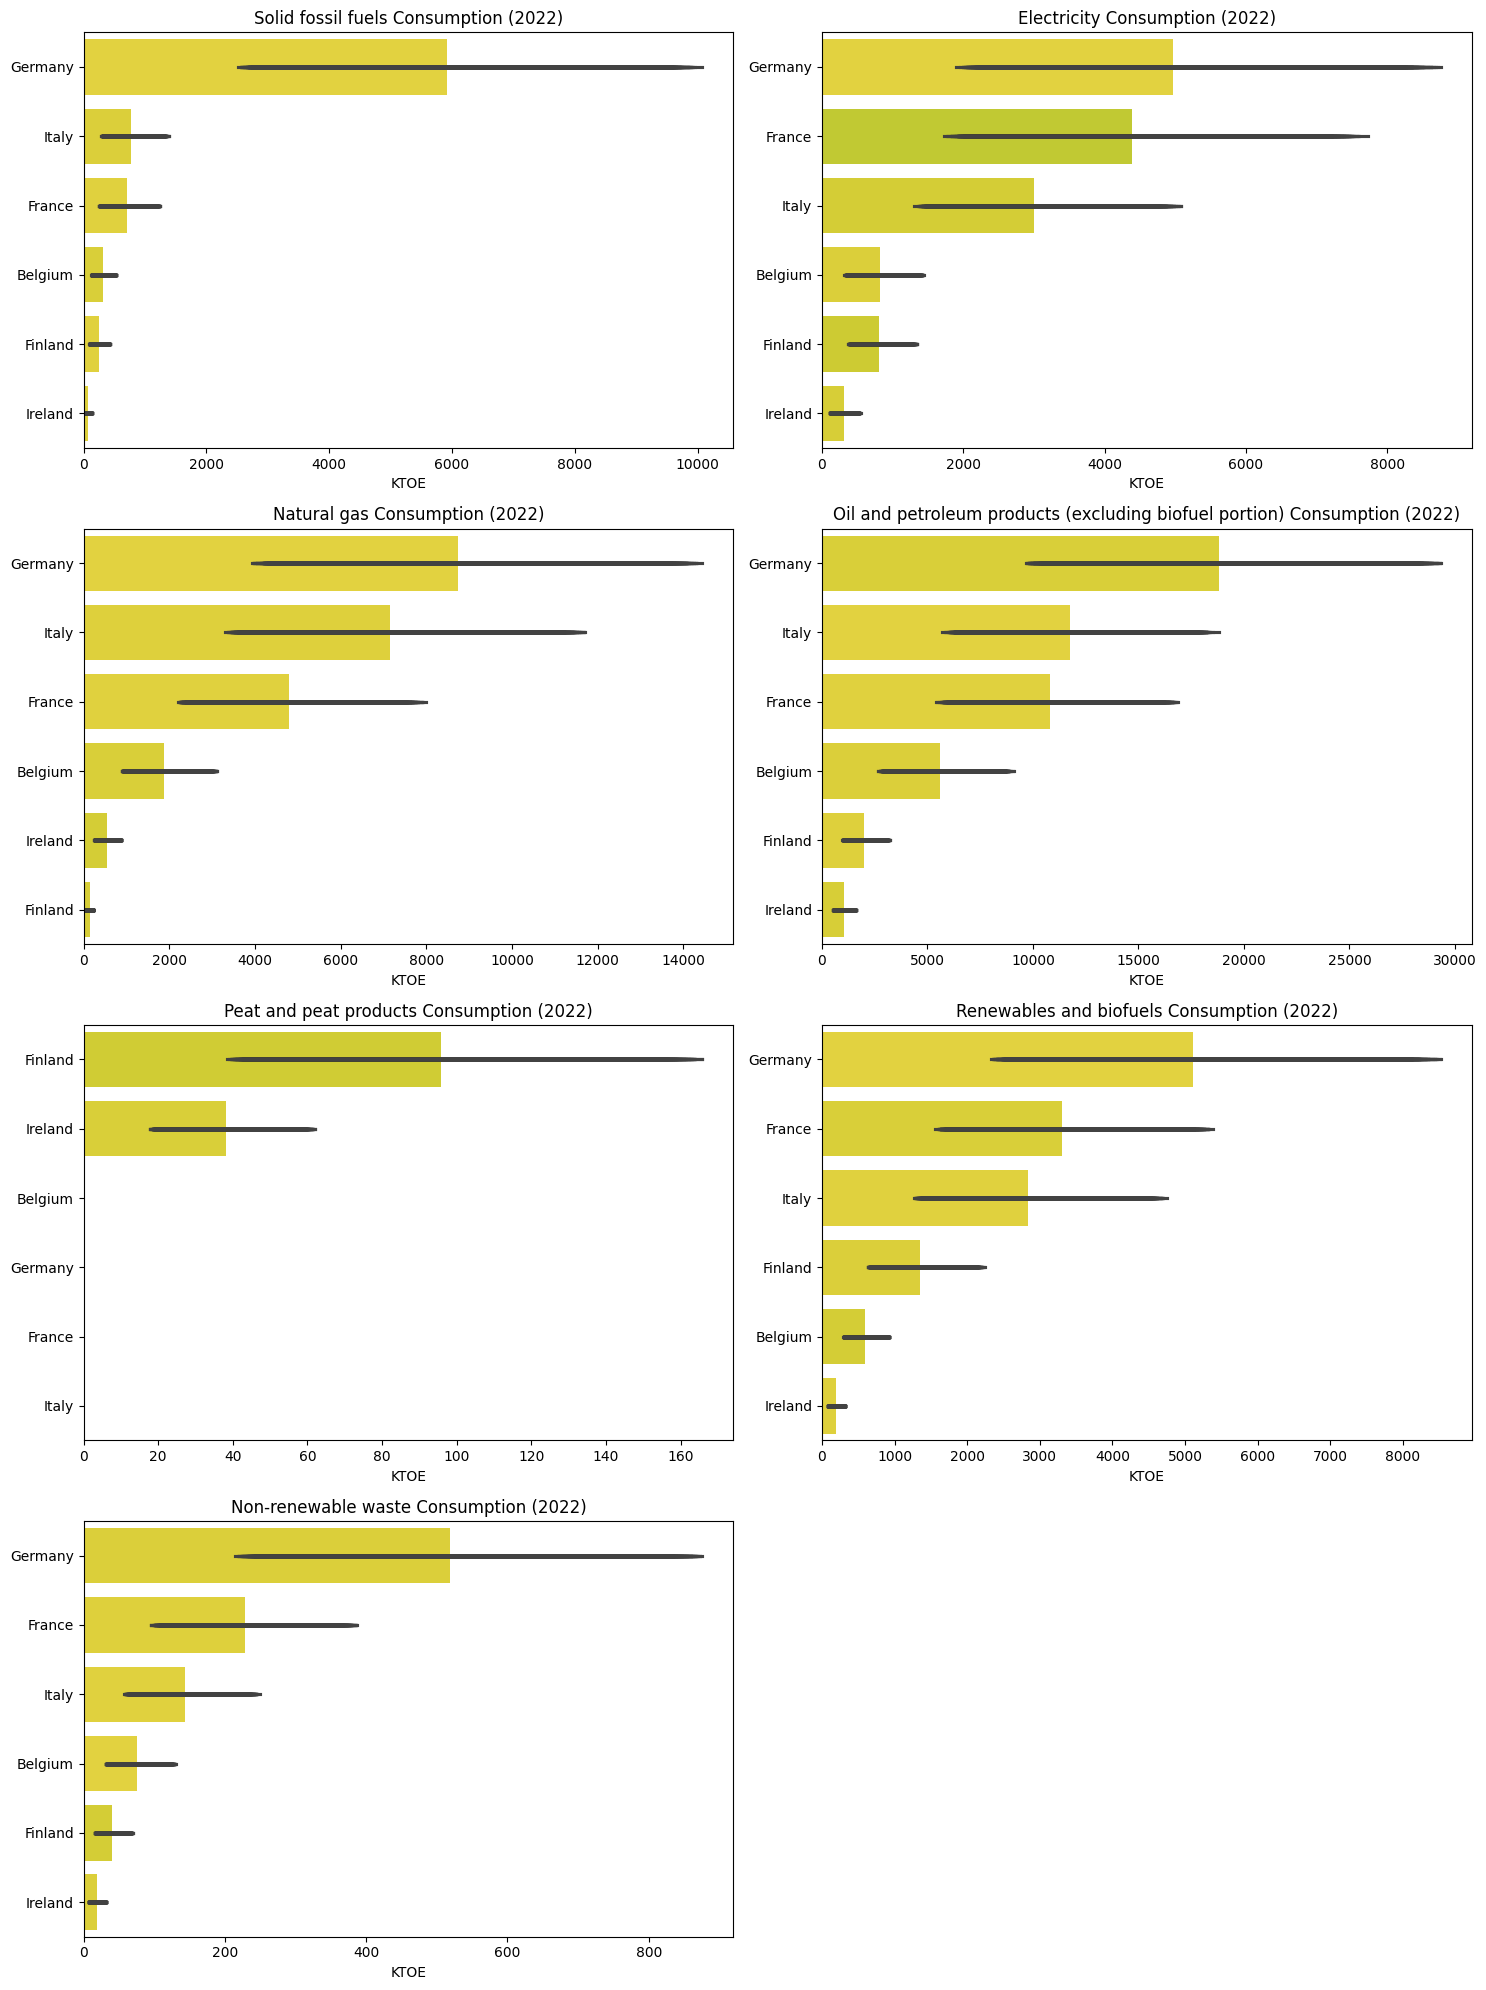

In [86]:
df_2022 = df_ire_eu[df_ire_eu['Year'] == 2022]

energy_types = df_2022['Energy Type'].unique()

n_rows = (len(energy_types) + 1) // 2  
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
axes = axes.flatten() 

for i, energy_type in enumerate(energy_types):
    df_sub = df_2022[df_2022['Energy Type'] == energy_type]
    sns.barplot(
        data=df_sub,
        x='Value',
        y='Country',
        order=df_sub.sort_values('Value', ascending=False).Country,
        ax=axes[i],
        palette='viridis'
    )
    axes[i].set_title(f'{energy_type} Consumption (2022)')
    axes[i].set_xlabel('KTOE')
    axes[i].set_ylabel('')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

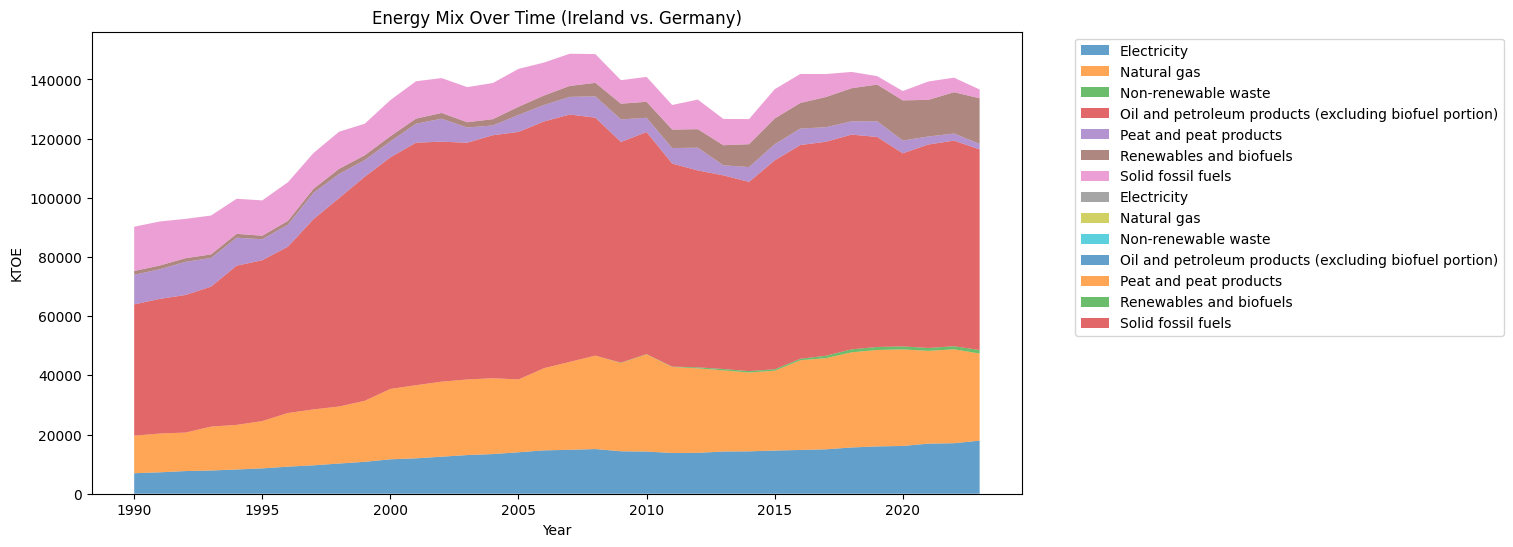

In [87]:
df_stack = df_ire_eu.pivot_table(index=['Year', 'Country'], columns='Energy Type', values='Value', aggfunc='sum').reset_index()

countries = ['Ireland', 'Germaany']
plt.figure(figsize=(12, 6))
for country in countries:
    df_temp = df_stack[df_stack['Country'] == country]
    plt.stackplot(df_temp['Year'], df_temp.iloc[:, 2:].T, labels=df_temp.columns[2:], alpha=0.7)
plt.title('Energy Mix Over Time (Ireland vs. Germany)')
plt.xlabel('Year')
plt.ylabel('KTOE')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

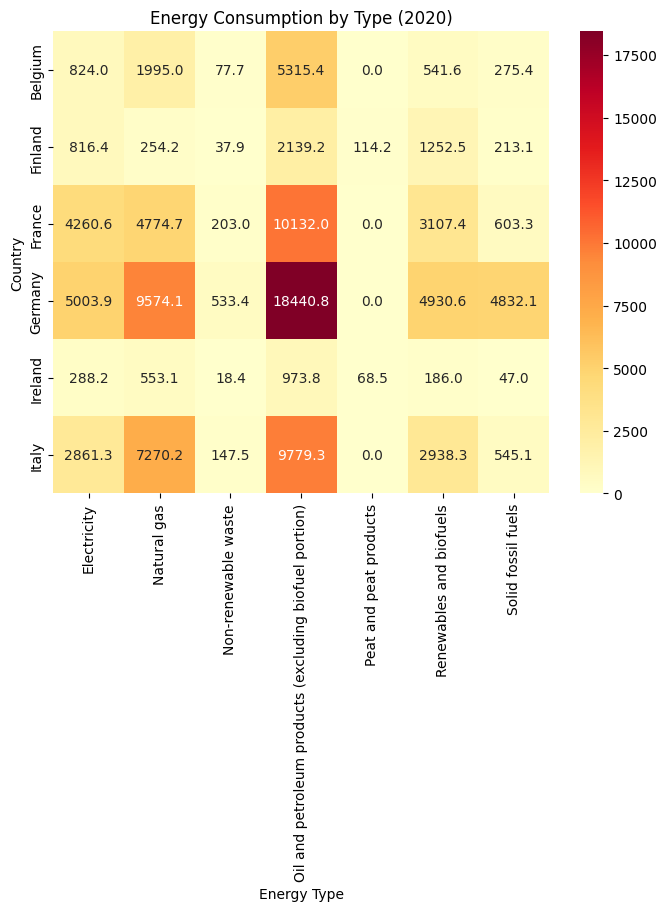

In [88]:
df_heat = df_ire_eu[df_ire_eu['Year'] == 2020].pivot_table(index='Country', columns='Energy Type', values='Value')

plt.figure(figsize=(8,6))
sns.heatmap(df_heat, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title('Energy Consumption by Type (2020)')
plt.show()

In [89]:
#!pip install dash

## Plotly Interactive Dashboard

,Year,Energy Type,Value,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Bulgaria,Country_Croatia,Country_Cyprus,Country_Czechia,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_Iceland,Country_Ireland,Country_Italy,Country_Kosovo*,Country_Latvia,Country_Lithuania,Country_Luxembourg,Country_Malta,Country_Moldova,Country_Montenegro,Country_Netherlands,Country_North Macedonia,Country_Norway,Country_Poland,Country_Portugal,Country_Romania,Country_Serbia,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Sweden,Country_Türkiye,Country_Ukraine
0,1990,6,571.289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1990,0,144.626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1990,1,203.203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,3,624.831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1990,4,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9053,2023,1,27431.514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9054,2023,3,39929.990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9055,2023,4,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9056,2023,5,5651.837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [112]:
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
import dash


# Initialize Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Energy Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Energy Type:"),
        dcc.Dropdown(
            id='energy-type-dropdown',
            options=[{'label': i, 'value': i} for i in sorted(df['Energy Type'].unique())],
            value=sorted(df['Energy Type'].unique())[0],
            style={'width': '50%'}
        ),

        html.Label("Select Supply/Consumption Type:"),
        dcc.Dropdown(
            id='supply-consumption-dropdown',
            options=[{'label': i, 'value': i} for i in sorted(df['Energy Supply and Consumption'].unique())],
            value=sorted(df['Energy Supply and Consumption'].unique())[0],
            style={'width': '50%'}
        ),

        html.Label("Select Year Range:"),
        dcc.RangeSlider(
            id='year-slider',
            min=df['Year'].min(),
            max=df['Year'].max(),
            step=1,
            value=[df['Year'].min(), df['Year'].max()],
            marks={str(year): str(year) for year in df['Year'].unique()},
            tooltip={"placement": "bottom", "always_visible": False},
        )
    ], style={'padding': 10}),

    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='line-chart'),
    dcc.Graph(id='scatter-plot'),
    dcc.Graph(id='box-plot'),
    dcc.Graph(id='area-plot')
])

@app.callback(
    [Output('bar-chart', 'figure'),
     Output('line-chart', 'figure'),
     Output('scatter-plot', 'figure'),
     Output('box-plot', 'figure'),
     Output('area-plot', 'figure')],
    [Input('energy-type-dropdown', 'value'),
     Input('supply-consumption-dropdown', 'value'),
     Input('year-slider', 'value')]
)
def update_dashboard(energy_type, supply_consumption, year_range):
    filtered_df = df[
        (df['Energy Type'] == energy_type) &
        (df['Energy Supply and Consumption'] == supply_consumption) &
        (df['Year'] >= year_range[0]) & (df['Year'] <= year_range[1])
    ]

    if filtered_df.empty:
        return [{}]*5

    bar_fig = px.bar(filtered_df.groupby('Country')['Value'].sum().reset_index(),
                     x='Country', y='Value', title='Total Energy Value by Country')

    line_fig = px.line(filtered_df.groupby('Year')['Value'].sum().reset_index(),
                       x='Year', y='Value', title='Yearly Energy Trend')

    scatter_fig = px.scatter(filtered_df, x='Year', y='Value', color='Country',
                             title='Energy Value Distribution Over Years')

    box_fig = px.box(filtered_df, x='Country', y='Value',
                     title='Energy Value Distribution by Country')

    area_df = filtered_df.groupby(['Year', 'Country'])['Value'].sum().reset_index()
    area_fig = px.area(area_df, x='Year', y='Value', color='Country',
                       title='Energy Value Trends by Country')

    return bar_fig, line_fig, scatter_fig, box_fig, area_fig

if __name__ == '__main__':
    app.run(debug=False, mode='inline')


KeyError: 'Energy Supply and Consumption'

# Feature Engineering

In [91]:
# Filter only 'Final consumption - energy use' records
Final_consumption_df = df_cleaned[df_cleaned['Energy Supply and Consumption'] == 'Final consumption - energy use'].reset_index(drop=True)

# Select relevant columns (Country, Year, Energy Type, Value)
ml_df = Final_consumption_df[['Country', 'Year', 'Energy Type', 'Value']]

In [92]:
ml_df = ml_df.sort_values(['Year','Country']).reset_index(drop=True)

In [93]:
ml_df.head()

,Country,Year,Energy Type,Value
0,Albania,1990,Solid fossil fuels,571.289
1,Albania,1990,Electricity,144.626
2,Albania,1990,Natural gas,203.203
3,Albania,1990,Oil and petroleum products (excluding biofuel ...,624.831
4,Albania,1990,Peat and peat products,0.000


In [94]:
ml_df.tail()

,Country,Year,Energy Type,Value
9053,Türkiye,2023,Natural gas,27431.514
9054,Türkiye,2023,Oil and petroleum products (excluding biofuel ...,39929.990
9055,Türkiye,2023,Peat and peat products,0.000
9056,Türkiye,2023,Renewables and biofuels,5651.837
9057,Türkiye,2023,Non-renewable waste,1192.301


In [95]:
ml_df['Country'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia',
       'European Union - 27 countries (from 2020)', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Türkiye',
       'Ukraine', 'United Kingdom', 'Kosovo*', 'Montenegro', 'Moldova',
       'Georgia', 'Bosnia and Herzegovina'], dtype=object)

In [96]:
#Removing United Kingdome and European Union - 27 countries (from 2020)
ml_df = ml_df[~ml_df['Country'].isin(['United Kingdom', 'European Union - 27 countries (from 2020)'])]

In [97]:
ml_df['Country'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Türkiye',
       'Ukraine', 'Kosovo*', 'Montenegro', 'Moldova', 'Georgia',
       'Bosnia and Herzegovina'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ml_df_encoded = pd.get_dummies(ml_df, columns=['Country'], dtype = int, drop_first=True)
ml_df_encoded['Energy Type'] = le.fit_transform(ml_df_encoded['Energy Type'])
ml_df_encoded.head()

,Year,Energy Type,Value,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Bulgaria,Country_Croatia,Country_Cyprus,Country_Czechia,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_Iceland,Country_Ireland,Country_Italy,Country_Kosovo*,Country_Latvia,Country_Lithuania,Country_Luxembourg,Country_Malta,Country_Moldova,Country_Montenegro,Country_Netherlands,Country_North Macedonia,Country_Norway,Country_Poland,Country_Portugal,Country_Romania,Country_Serbia,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Sweden,Country_Türkiye,Country_Ukraine
0,1990,6,571.289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1990,0,144.626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1990,1,203.203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,3,624.831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1990,4,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
ml_df_encoded['Year']= pd.to_datetime(ml_df_encoded['Year'], format='%Y').dt.year

In [100]:
ml_df_encoded.head()

,Year,Energy Type,Value,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Bulgaria,Country_Croatia,Country_Cyprus,Country_Czechia,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_Iceland,Country_Ireland,Country_Italy,Country_Kosovo*,Country_Latvia,Country_Lithuania,Country_Luxembourg,Country_Malta,Country_Moldova,Country_Montenegro,Country_Netherlands,Country_North Macedonia,Country_Norway,Country_Poland,Country_Portugal,Country_Romania,Country_Serbia,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Sweden,Country_Türkiye,Country_Ukraine
0,1990,6,571.289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1990,0,144.626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1990,1,203.203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,3,624.831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1990,4,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
df = ml_df_encoded

train = df[df['Year'] < 2018]
test = df[df['Year'] >= 2018]

X_train = train.drop(['Value'], axis=1)
y_train = train['Value']
X_test = test.drop(['Value'], axis=1)
y_test = test['Value']

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [120]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [121]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
svr_preds = svr.predict(X_test_scaled)

In [122]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [123]:
model = XGBRegressor()
model.fit(X_train, y_train)
boost_preds = model.predict(X_test)

In [124]:
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{model_name} RMSE: {mean_squared_error(y_true, y_pred)**0.5:.2f}")

evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, rf_preds, "Random Forest")
evaluate(y_test, svr_preds, "SVR")
evaluate(y_test, boost_preds, "Xgboost")

Linear Regression MAE: 3706.43
Linear Regression RMSE: 6759.41
Random Forest MAE: 325.48
Random Forest RMSE: 958.68
SVR MAE: 3722.20
SVR RMSE: 9554.65
Xgboost MAE: 465.66
Xgboost RMSE: 1055.49


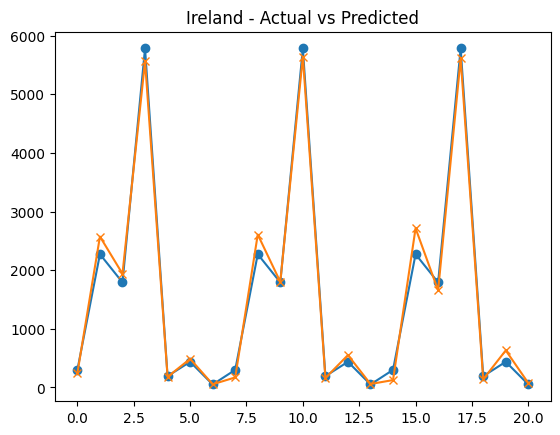

In [135]:
df_ire = df[(df['Year'] > 2020) & (df['Country_Ireland'] == 1)]

X = df_ire.drop('Value', axis=1)
y = df_ire['Value']

plt.plot(rf.predict(X), label="Predicted", marker='o')
plt.plot(y.values, label='Actual', marker='x')
plt.title('Ireland - Actual vs Predicted')
plt.show()

In [125]:
# GridSearchCV method on Random forest

In [114]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [115]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],   # Tree depth
    'min_samples_split': [2, 5, 10],   # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],     # Minimum samples at leaf
    'max_features': ['sqrt', 'log2']    # Features to consider at splits
}

In [127]:
# Using TimeSeriesSplit to prevent lookahead bias
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,                # Time-series cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,              # Use all CPU cores
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [129]:
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

# Feature Importance
best_rf = grid_search.best_estimator_
importances = best_rf.feature_importances_
pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE: 1686.2548693243875


,Feature,Importance
1,Energy Type,0.458577
14,Country_Germany,0.217162
12,Country_France,0.102135
19,Country_Italy,0.071220
0,Year,0.043368
36,Country_Spain,0.028115
39,Country_Ukraine,0.013364
38,Country_Türkiye,0.011462
27,Country_Netherlands,0.008064
30,Country_Poland,0.007772


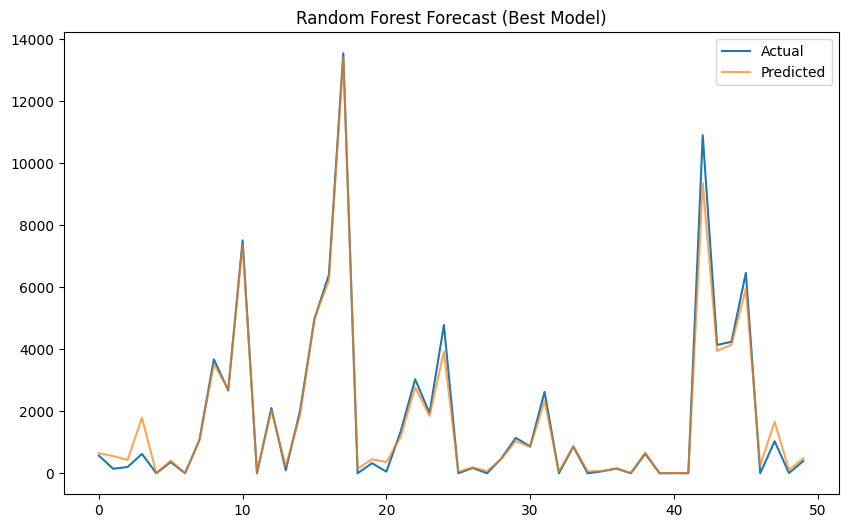

In [134]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(y_train.values[:50], label='Actual')
plt.plot(best_rf.predict(X_train[:50]), label='Predicted', alpha=0.7)
plt.title("Random Forest Forecast (Best Model)")
plt.legend()
plt.show()

# Time Series Modeling

In [584]:
ireland_gas = df[(df['Country_Ireland'] == 1) & (df['Energy Type'] == 1)]
ts_data = ireland_gas[['Year', 'Value']].set_index('Year').sort_index()

In [585]:
ts_data

,Value
Year,
1990,568.465
1991,650.245
1992,666.746
1993,762.279
1994,770.928
1995,795.572
1996,869.733
1997,870.959
1998,963.860


ADF Statistic: -2.062097362924547, p-value: 0.2600259078106209


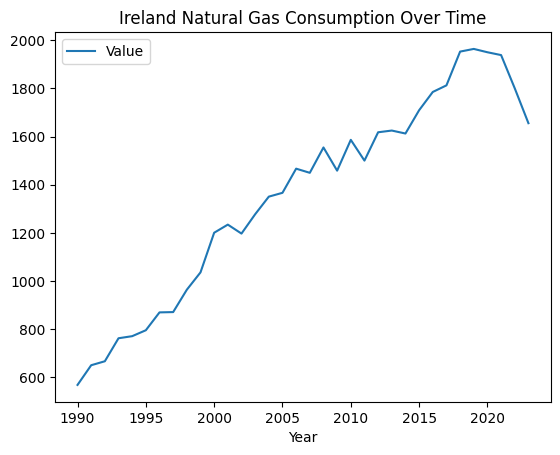

In [586]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(ts_data['Value'])
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")  # p < 0.05 → stationary

# Plot
ts_data.plot(title="Ireland Natural Gas Consumption Over Time")
plt.show()

In [593]:
def test_stationarity(timeseries):
    
    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 3).mean()
    rolstd = timeseries.rolling(window = 3).std()
    
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')
    
    
    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] = j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                 -2.062097
p-value                         0.260026
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


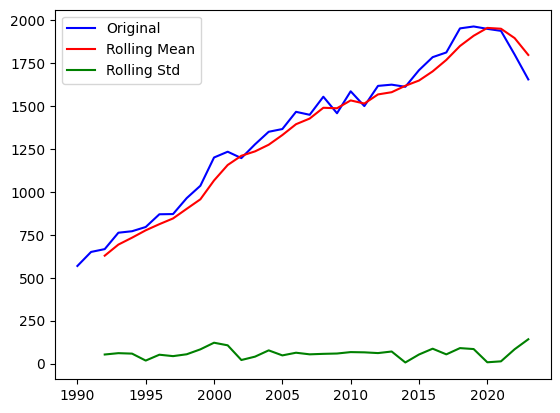

In [595]:
test_stationarity(ts_data)

In [610]:
ts_data

,Value
Year,
1990,568.465
1991,650.245
1992,666.746
1993,762.279
1994,770.928
1995,795.572
1996,869.733
1997,870.959
1998,963.860


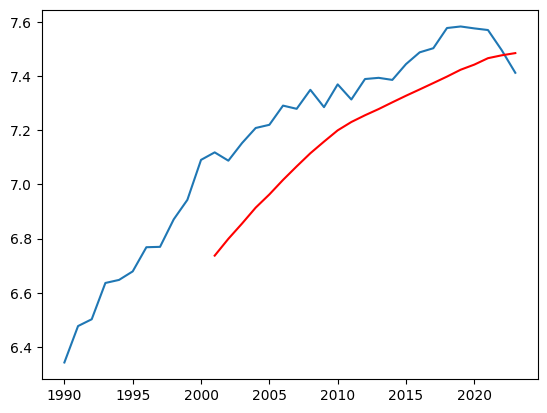

In [613]:
ts_data_log = np.log(ts_data)
movingAverage = ts_data_log.rolling(window = 12).mean()
movingSTD = ts_data_log.rolling(window = 12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')
plt.show()

Results of Dickey-Fuller Test :

Test Statistic                 -3.443049
p-value                         0.009576
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


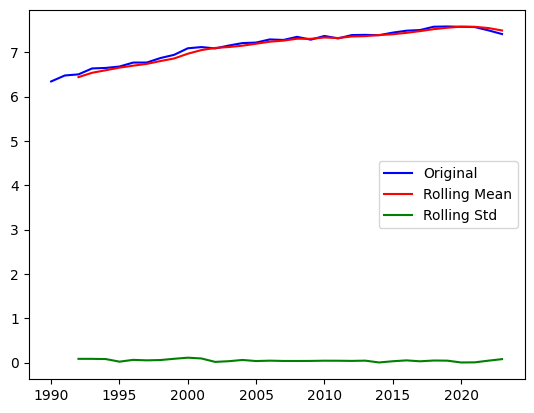

In [616]:
test_stationarity(ts_data_log)

In [625]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_data_log, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   34
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  42.236
Date:                Wed, 14 May 2025   AIC                            -76.473
Time:                        14:36:47   BIC                            -70.368
Sample:                             0   HQIC                           -74.391
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9087      0.455     15.193      0.000       6.017       7.800
ar.L1          0.9900      0.033     30.201      0.000       0.926       1.054
ma.L1          0.1027      0.243      0.422      0.6

In [626]:
forecast_log = model_fit.forecast(steps=5)

In [627]:
forecast = np.exp(forecast_log)
forecast_years = list(range(ts_data_log.index[-1] + 1, ts_data_log.index[-1] + 1 + 5))

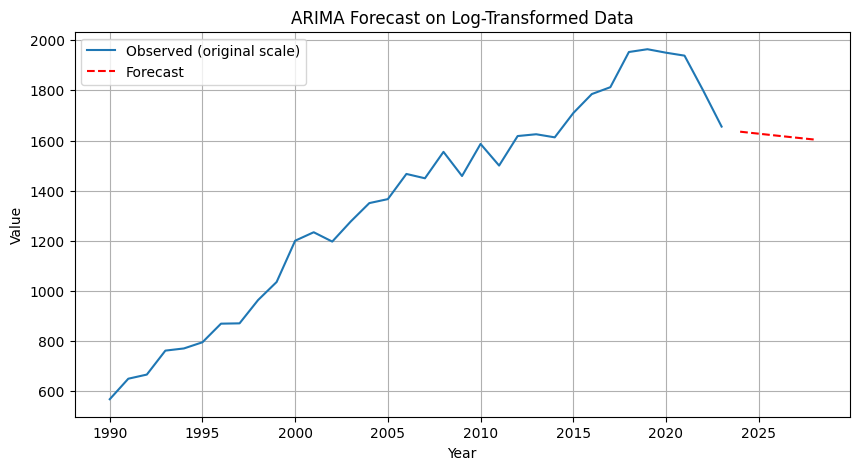

In [628]:
plt.figure(figsize=(10, 5))
plt.plot(np.exp(ts_data_log), label='Observed (original scale)')
plt.plot(forecast_years, forecast, label='Forecast', linestyle='--', color='red')
plt.title('ARIMA Forecast on Log-Transformed Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [629]:
forecast_years, forecast

([2024, 2025, 2026, 2027, 2028],
 34    1635.171296
 35    1627.149818
 36    1619.247470
 37    1611.462102
 38    1603.791609
 Name: predicted_mean, dtype: float64)